In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - partner_iv

In [3]:
xlsx = pd.ExcelFile(
    "../../../data/raw/partner_iv/DB_Master_CP1_latest.xlsx", engine="openpyxl"
)

<IPython.core.display.Javascript object>

In [4]:
xlsx.sheet_names

['DB0 Kiln',
 'DB1 Fuels emissions',
 'DB2 Clinker',
 'DB3 Cement',
 'raw meal 45 mi kiln A ',
 'raw meal 45 mi kiln B',
 'Hot raw meal 1 per day Kiln A',
 'Hot raw meal 1 per day Kiln B',
 'Clinker BU 1 per day Klin A',
 'Clinker BU 1 per day Klin B',
 'Cem A produc control',
 'Cem A exp control',
 'Cem B produc control',
 'Cem B exp control',
 'Cem C produc control',
 'Cem c exp control',
 'Petcoke composite sample 4 mont',
 'petcoke powder',
 'AF comp samp 4 months',
 'AF 1 daily',
 'AF 2 daily',
 'AF 3 daily']

<IPython.core.display.Javascript object>

In [5]:
len(xlsx.sheet_names)

22

<IPython.core.display.Javascript object>

## Cem A exp control

In [6]:
df = pd.read_excel(xlsx, sheet_name="Cem A exp control", skiprows=[1, 2])
df = df[[col for col in df.columns.fillna("Unnamed") if "Unnamed" not in col]]

<IPython.core.display.Javascript object>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CEM A expedition control             322 non-null    object        
 1   sigla                                322 non-null    int64         
 2   data                                 322 non-null    datetime64[ns]
 3   LOI                                  258 non-null    object        
 4   SO3                                  322 non-null    float64       
 5   Cl-                                  322 non-null    float64       
 6   Blaine                               321 non-null    float64       
 7   ph2oimm                              320 non-null    float64       
 8   Initial Setting Time                 319 non-null    float64       
 9   Soundness                            318 non-null    float64       
 10  flow          

<IPython.core.display.Javascript object>

# EDA

In [8]:
df.shape

(322, 45)

<IPython.core.display.Javascript object>

In [9]:
df.head()

CEM A expedition control  sigla       data   LOI   SO3    Cl-  Blaine  \
0                    CEM A  10120 2019-10-25  2.15  2.26  0.011  3281.0   
1                    CEM A  10157 2019-10-31   NaN  2.50  0.030     NaN   
2                    CEM A  10160 2019-11-04  2.18  2.43  0.032  3541.0   
3                    CEM A  10176 2019-11-06  2.03  2.66  0.049  3585.0   
4                    CEM A  10209 2019-11-11  1.95  2.41  0.042  3195.0   

   ph2oimm  Initial Setting Time  Soundness  ...  Quartz  K2SO4  \
0     28.2                 180.0        0.0  ...    0.14   1.12   
1     28.2                 170.0        1.0  ...     NaN    NaN   
2     28.6                 160.0        1.0  ...     NaN    NaN   
3     28.6                 210.0        1.0  ...     NaN    NaN   
4     28.8                 160.0        1.0  ...     NaN    NaN   

   Langbeinite – MgK2(SO4)2  Aphthitalite – (K,Na)3(SO4)2  Gesso  Emiidrato  \
0                       0.0                          0.56   1.47       1.07   
1                       NaN                           NaN    NaN        NaN   
2                       NaN                           NaN    NaN        NaN   
3                       NaN                           NaN    NaN        NaN   
4                       NaN                           NaN    NaN        NaN   

   Anidrite  Calcite – CaCO3  SO3_XRD  CO2_XRD  
0       0.0             2.15     2.05     0.95  
1       NaN              NaN      NaN      NaN  
2       NaN              NaN      NaN      NaN  
3       NaN              NaN      NaN      NaN  
4       NaN              NaN      NaN      NaN  

[5 rows x 45 columns]

<IPython.core.display.Javascript object>

In [10]:
df.tail()

CEM A expedition control  sigla       data   LOI   SO3    Cl-  Blaine  \
317                    CEM A  18454 2022-11-02   3.8  2.56  0.019  3512.0   
318                    CEM A  18469 2022-11-03   3.6  2.51  0.016  3306.0   
319                    CEM A  18509 2022-11-07  3.65  2.89  0.022  3659.0   
320                    CEM A  18527 2022-11-09  3.69  2.67  0.081  3625.0   
321                    CEM A  18570 2022-11-14  3.63  2.58  0.014  3368.0   

     ph2oimm  Initial Setting Time  Soundness  ...  Quartz  K2SO4  \
317     28.8                 240.0        0.0  ...    0.13   1.21   
318     28.8                 250.0        0.0  ...    0.54   1.26   
319     28.8                 210.0        0.0  ...    0.21   1.11   
320     28.8                 200.0        1.0  ...    0.17   1.17   
321     28.8                 200.0        0.0  ...     NaN    NaN   

     Langbeinite – MgK2(SO4)2  Aphthitalite – (K,Na)3(SO4)2  Gesso  Emiidrato  \
317                      0.13                          0.90   0.56       0.27   
318                      0.06                          1.04   0.30       0.34   
319                      0.12                          0.79   0.38       0.18   
320                      0.01                          0.89   0.78       0.06   
321                       NaN                           NaN    NaN        NaN   

     Anidrite  Calcite – CaCO3  SO3_XRD  CO2_XRD  
317      0.88             5.76     1.99     2.53  
318      0.78             6.73     1.89     2.96  
319      1.23             6.23     1.95     2.74  
320      1.01             6.66     1.96     2.93  
321       NaN              NaN      NaN      NaN  

[5 rows x 45 columns]

<IPython.core.display.Javascript object>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CEM A expedition control             322 non-null    object        
 1   sigla                                322 non-null    int64         
 2   data                                 322 non-null    datetime64[ns]
 3   LOI                                  258 non-null    object        
 4   SO3                                  322 non-null    float64       
 5   Cl-                                  322 non-null    float64       
 6   Blaine                               321 non-null    float64       
 7   ph2oimm                              320 non-null    float64       
 8   Initial Setting Time                 319 non-null    float64       
 9   Soundness                            318 non-null    float64       
 10  flow          

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [12]:
df.dtypes.value_counts()

float64           41
object             2
int64              1
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [13]:
df.describe().transpose()

count                           mean  \
sigla                                322.0                   14288.031056   
data                                   322  2021-05-09 05:30:55.900621056   
SO3                                  322.0                       2.613851   
Cl-                                  322.0                       0.022149   
Blaine                               321.0                    3482.442368   
ph2oimm                              320.0                       28.47375   
Initial Setting Time                 319.0                     213.056426   
Soundness                            318.0                       0.610063   
flow                                 318.0                     112.160377   
rihcl                                 63.0                       0.327302   
2 days strenght                      322.0                      30.645652   
7 days strenght                        0.0                            NaN   
28 days strenght                     315.0                      54.311111   
residuo 24 micron                    321.0                      35.649938   
tratt. 32 µm                           0.0                            NaN   
tratt. 40 µm                           0.0                            NaN   
tratt. 63 µm                           0.0                            NaN   
SampleName                           321.0                   14274.691589   
R_wp                                 294.0                       5.528367   
Alite_M3 C3S M3                      294.0                      32.582823   
Alite_M1 C3S M1                      294.0                      32.990884   
Alite_Sum C3S tot                    294.0                      65.571701   
Ratio_M1 (rapporto M1/M3)            294.0                      50.395495   
C3S_CS (taglia dei cristalliti C3S)  294.0                      237.23983   
Belite_beta                          294.0                       9.051718   
C3A cub                              294.0                       2.192347   
C3A_ortho                            294.0                        2.19716   
C3A tot                              294.0                       4.388044   
C4AF                                 294.0                      11.395816   
CaO                                  294.0                       0.300612   
Ca(OH)2                              294.0                       0.748793   
Calce libera                         294.0                       0.866224   
Periclasio (MgO)                     294.0                       0.469694   
Quartz                               294.0                       0.142058   
K2SO4                                294.0                        1.02483   
Langbeinite – MgK2(SO4)2             294.0                       0.112279   
Aphthitalite – (K,Na)3(SO4)2         294.0                       0.815544   
Gesso                                294.0                       0.993316   
Emiidrato                            294.0                       0.305408   
Anidrite                             294.0                       0.581293   
Calcite – CaCO3                      294.0                       4.105816   
SO3_XRD                              294.0                       1.894762   
CO2_XRD                              294.0                       1.804983   

                                                     min                  25%  \
sigla                                            10120.0              12196.5   
data                                 2019-10-25 00:00:00  2020-08-03 12:00:00   
SO3                                                 1.77                 2.48   
Cl-                                                0.011                0.016   
Blaine                                            2703.0               3317.0   
ph2oimm                                             24.6                 28.0   
Initial Setting Time                               140.0                190.0   


<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [14]:
df.describe(exclude="number").T

count unique    top freq  \
CEM A expedition control    322      1  CEM A  322   
data                        322    NaN    NaN  NaN   
LOI                       258.0  163.0   3.34  5.0   

                                                   mean                  min  \
CEM A expedition control                            NaN                  NaN   
data                      2021-05-09 05:30:55.900621056  2019-10-25 00:00:00   
LOI                                                 NaN                  NaN   

                                          25%                  50%  \
CEM A expedition control                  NaN                  NaN   
data                      2020-08-03 12:00:00  2021-05-14 12:00:00   
LOI                                       NaN                  NaN   

                                          75%                  max  
CEM A expedition control                  NaN                  NaN  
data                      2022-02-12 18:00:00  2022-11-14 00:00:00  
LOI                                       NaN                  NaN

<IPython.core.display.Javascript object>

In [15]:
dates = df["data"].copy()

<IPython.core.display.Javascript object>

In [16]:
print(dates.min())
print(dates.max())

2019-10-25 00:00:00
2022-11-14 00:00:00


<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

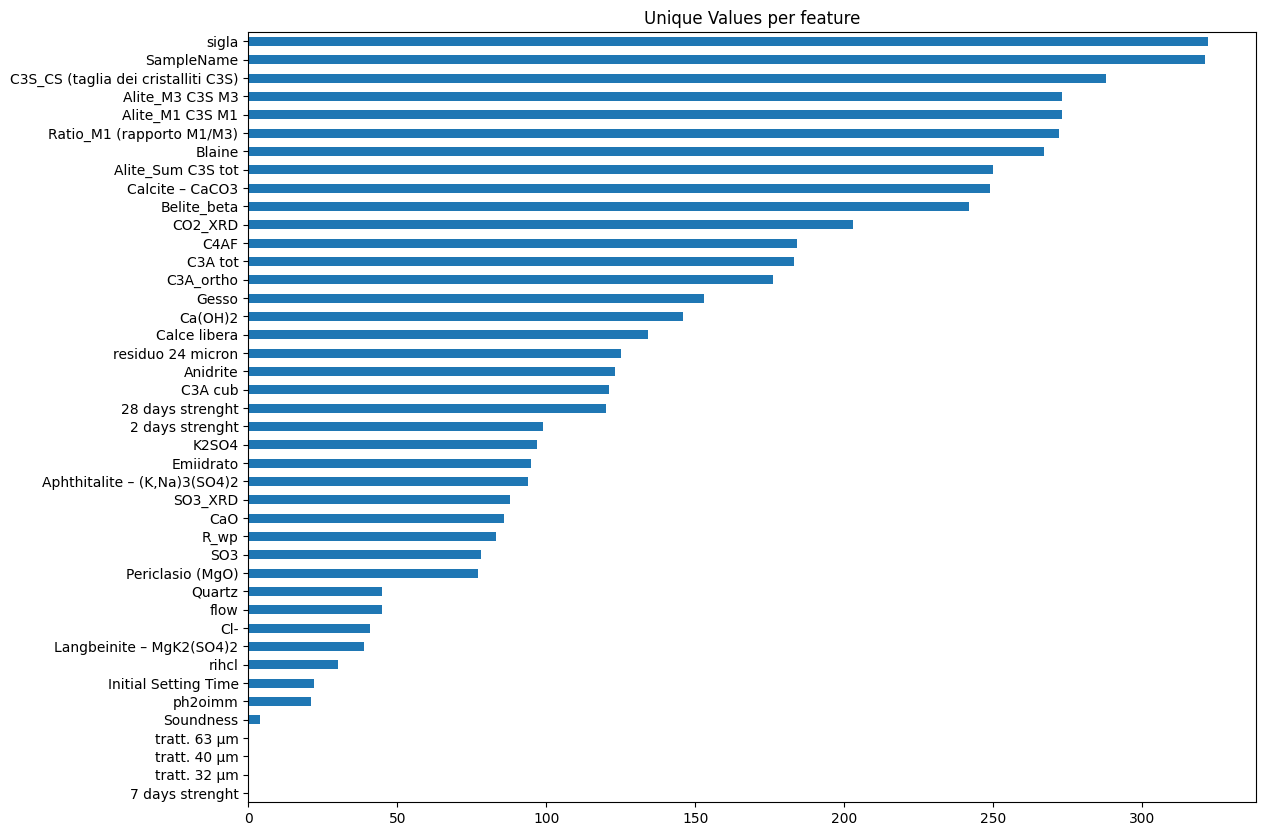

<IPython.core.display.Javascript object>

In [17]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2]),
 [Text(0, 0, 'CEM A expedition control'),
  Text(1, 0, 'LOI'),
  Text(2, 0, 'data')])

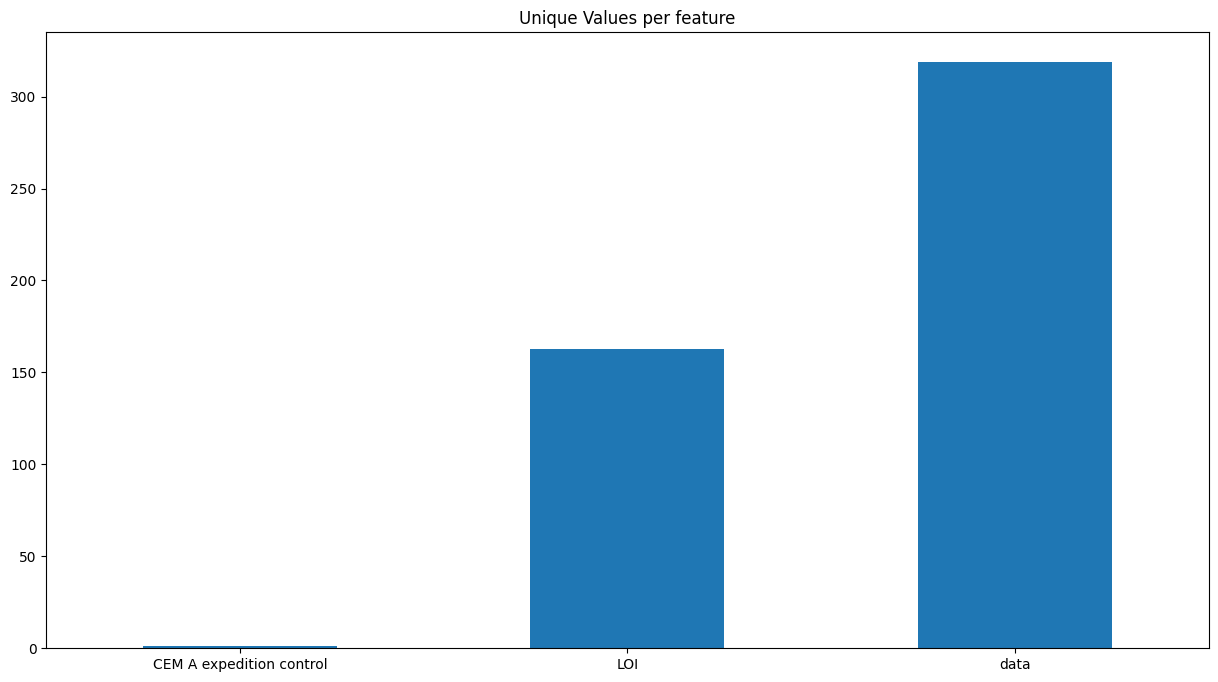

<IPython.core.display.Javascript object>

In [18]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Count of quantity of missing values')

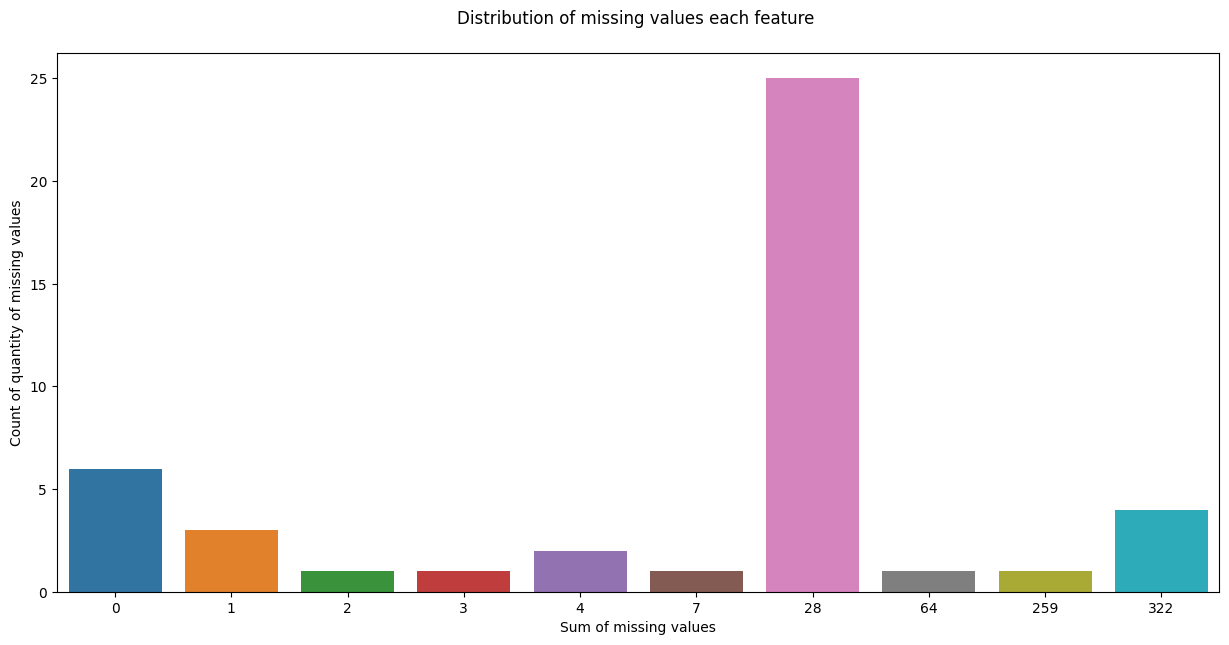

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df.isna().sum(), x=df.isna().sum().index)
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 45 artists>

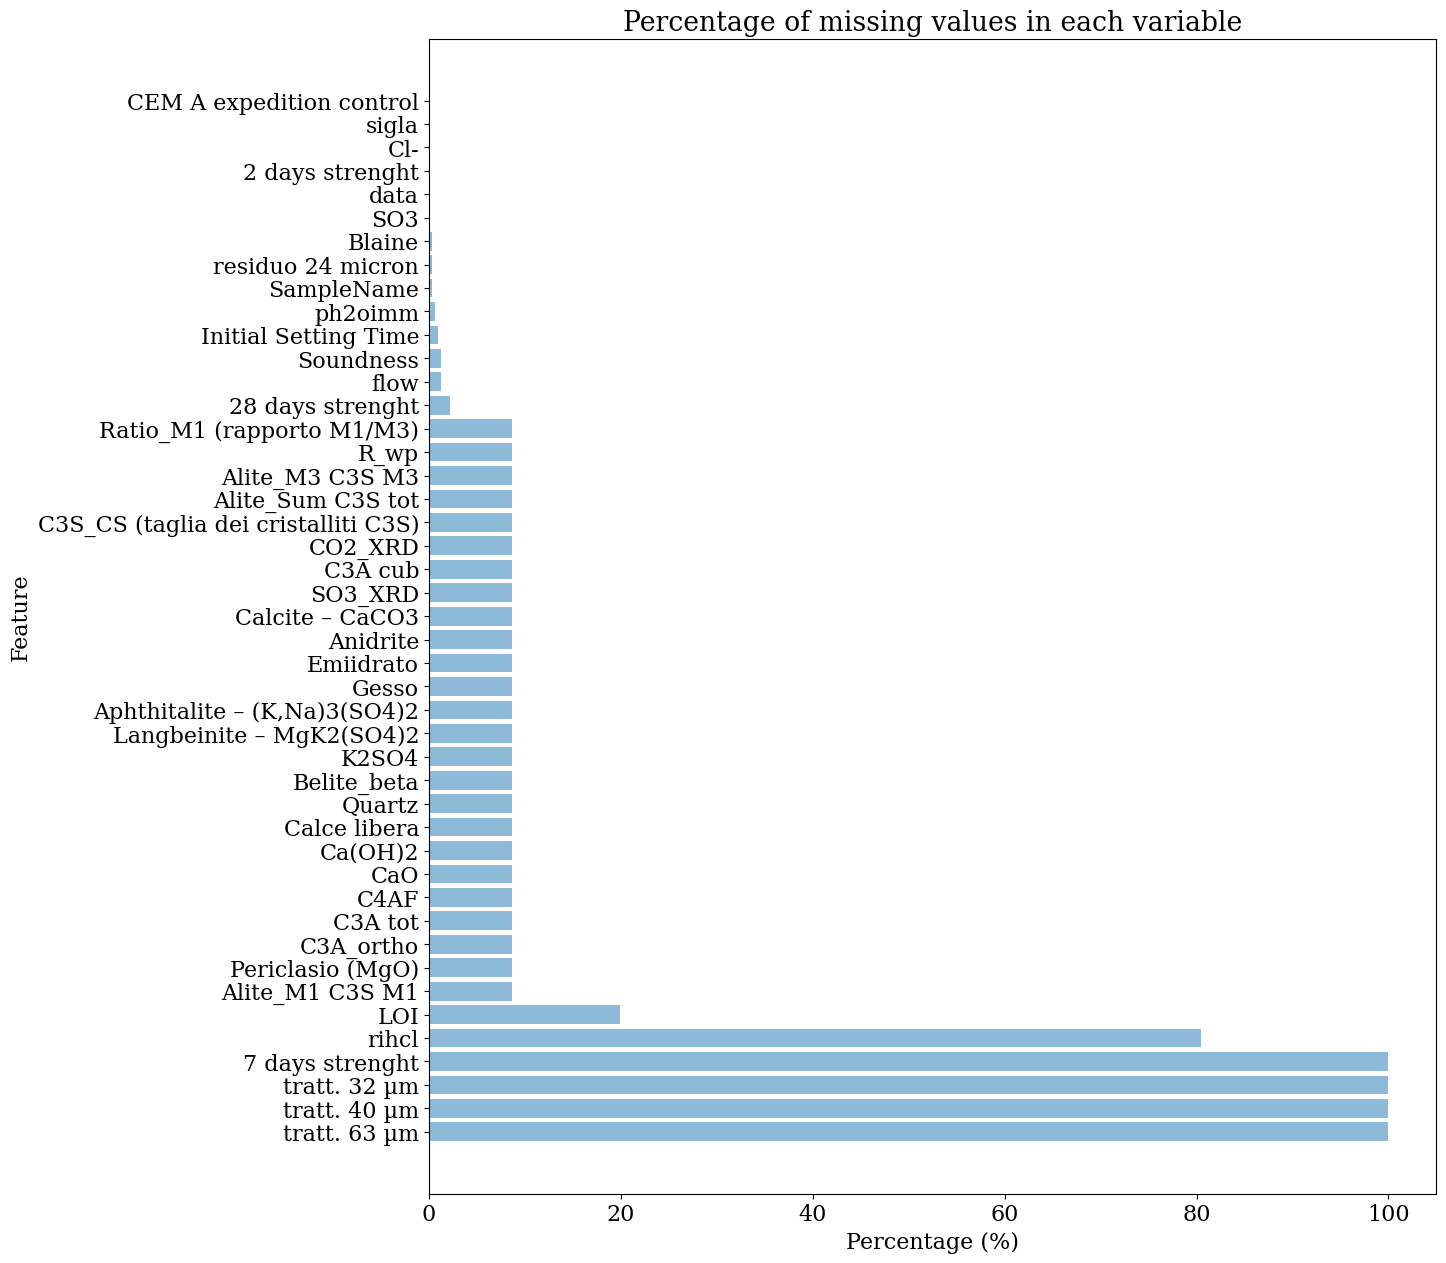

<IPython.core.display.Javascript object>

In [20]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [21]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 45 artists>

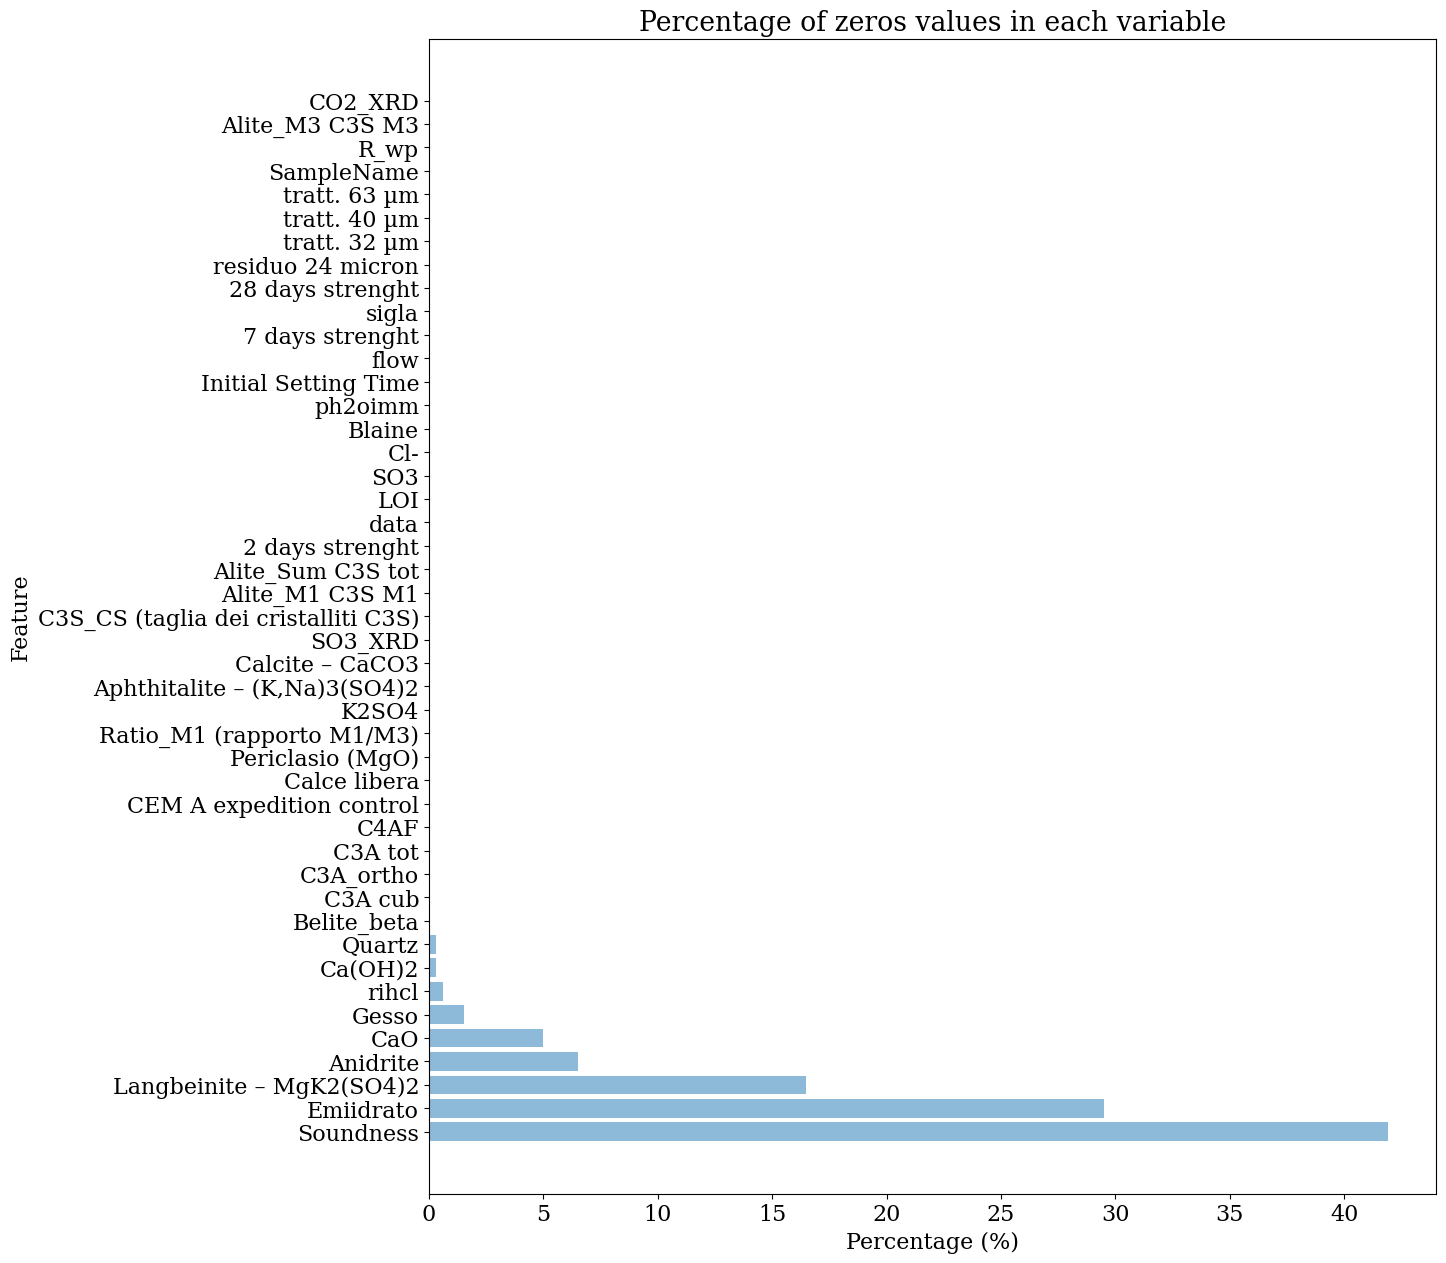

<IPython.core.display.Javascript object>

In [22]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [23]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

In [24]:
n_duplicates = df.drop(["data"], axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

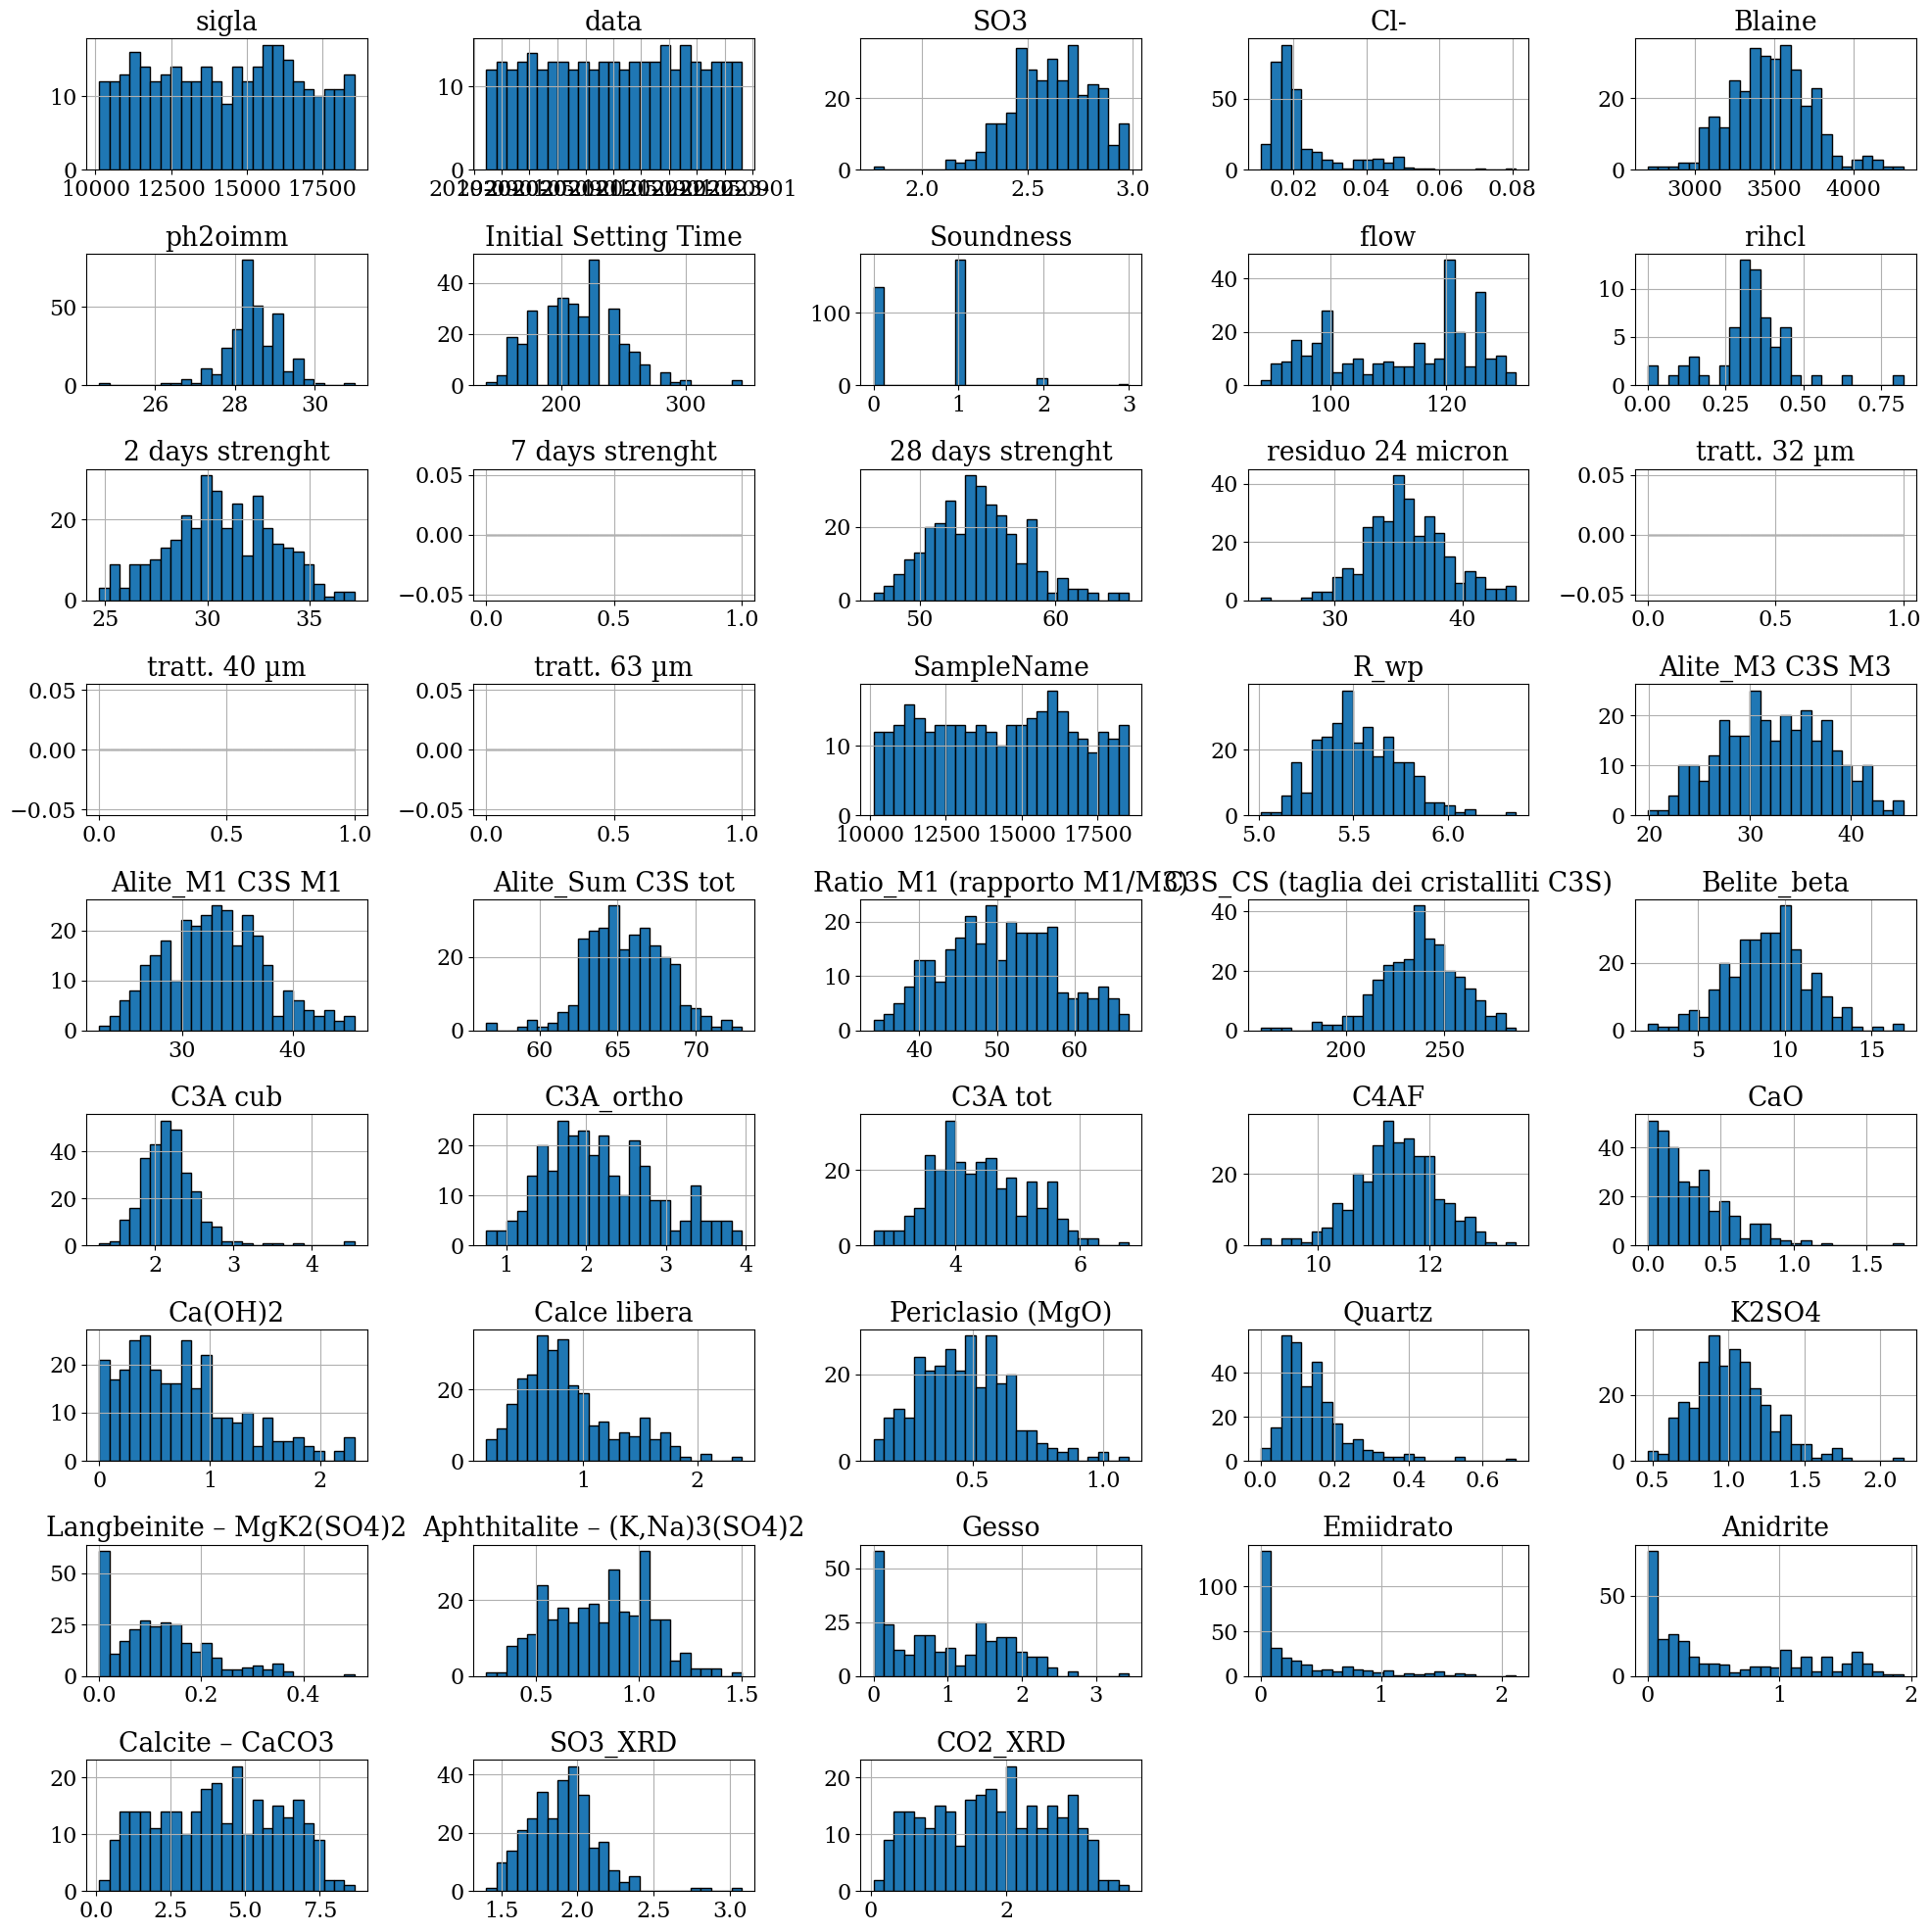

<IPython.core.display.Javascript object>

In [25]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

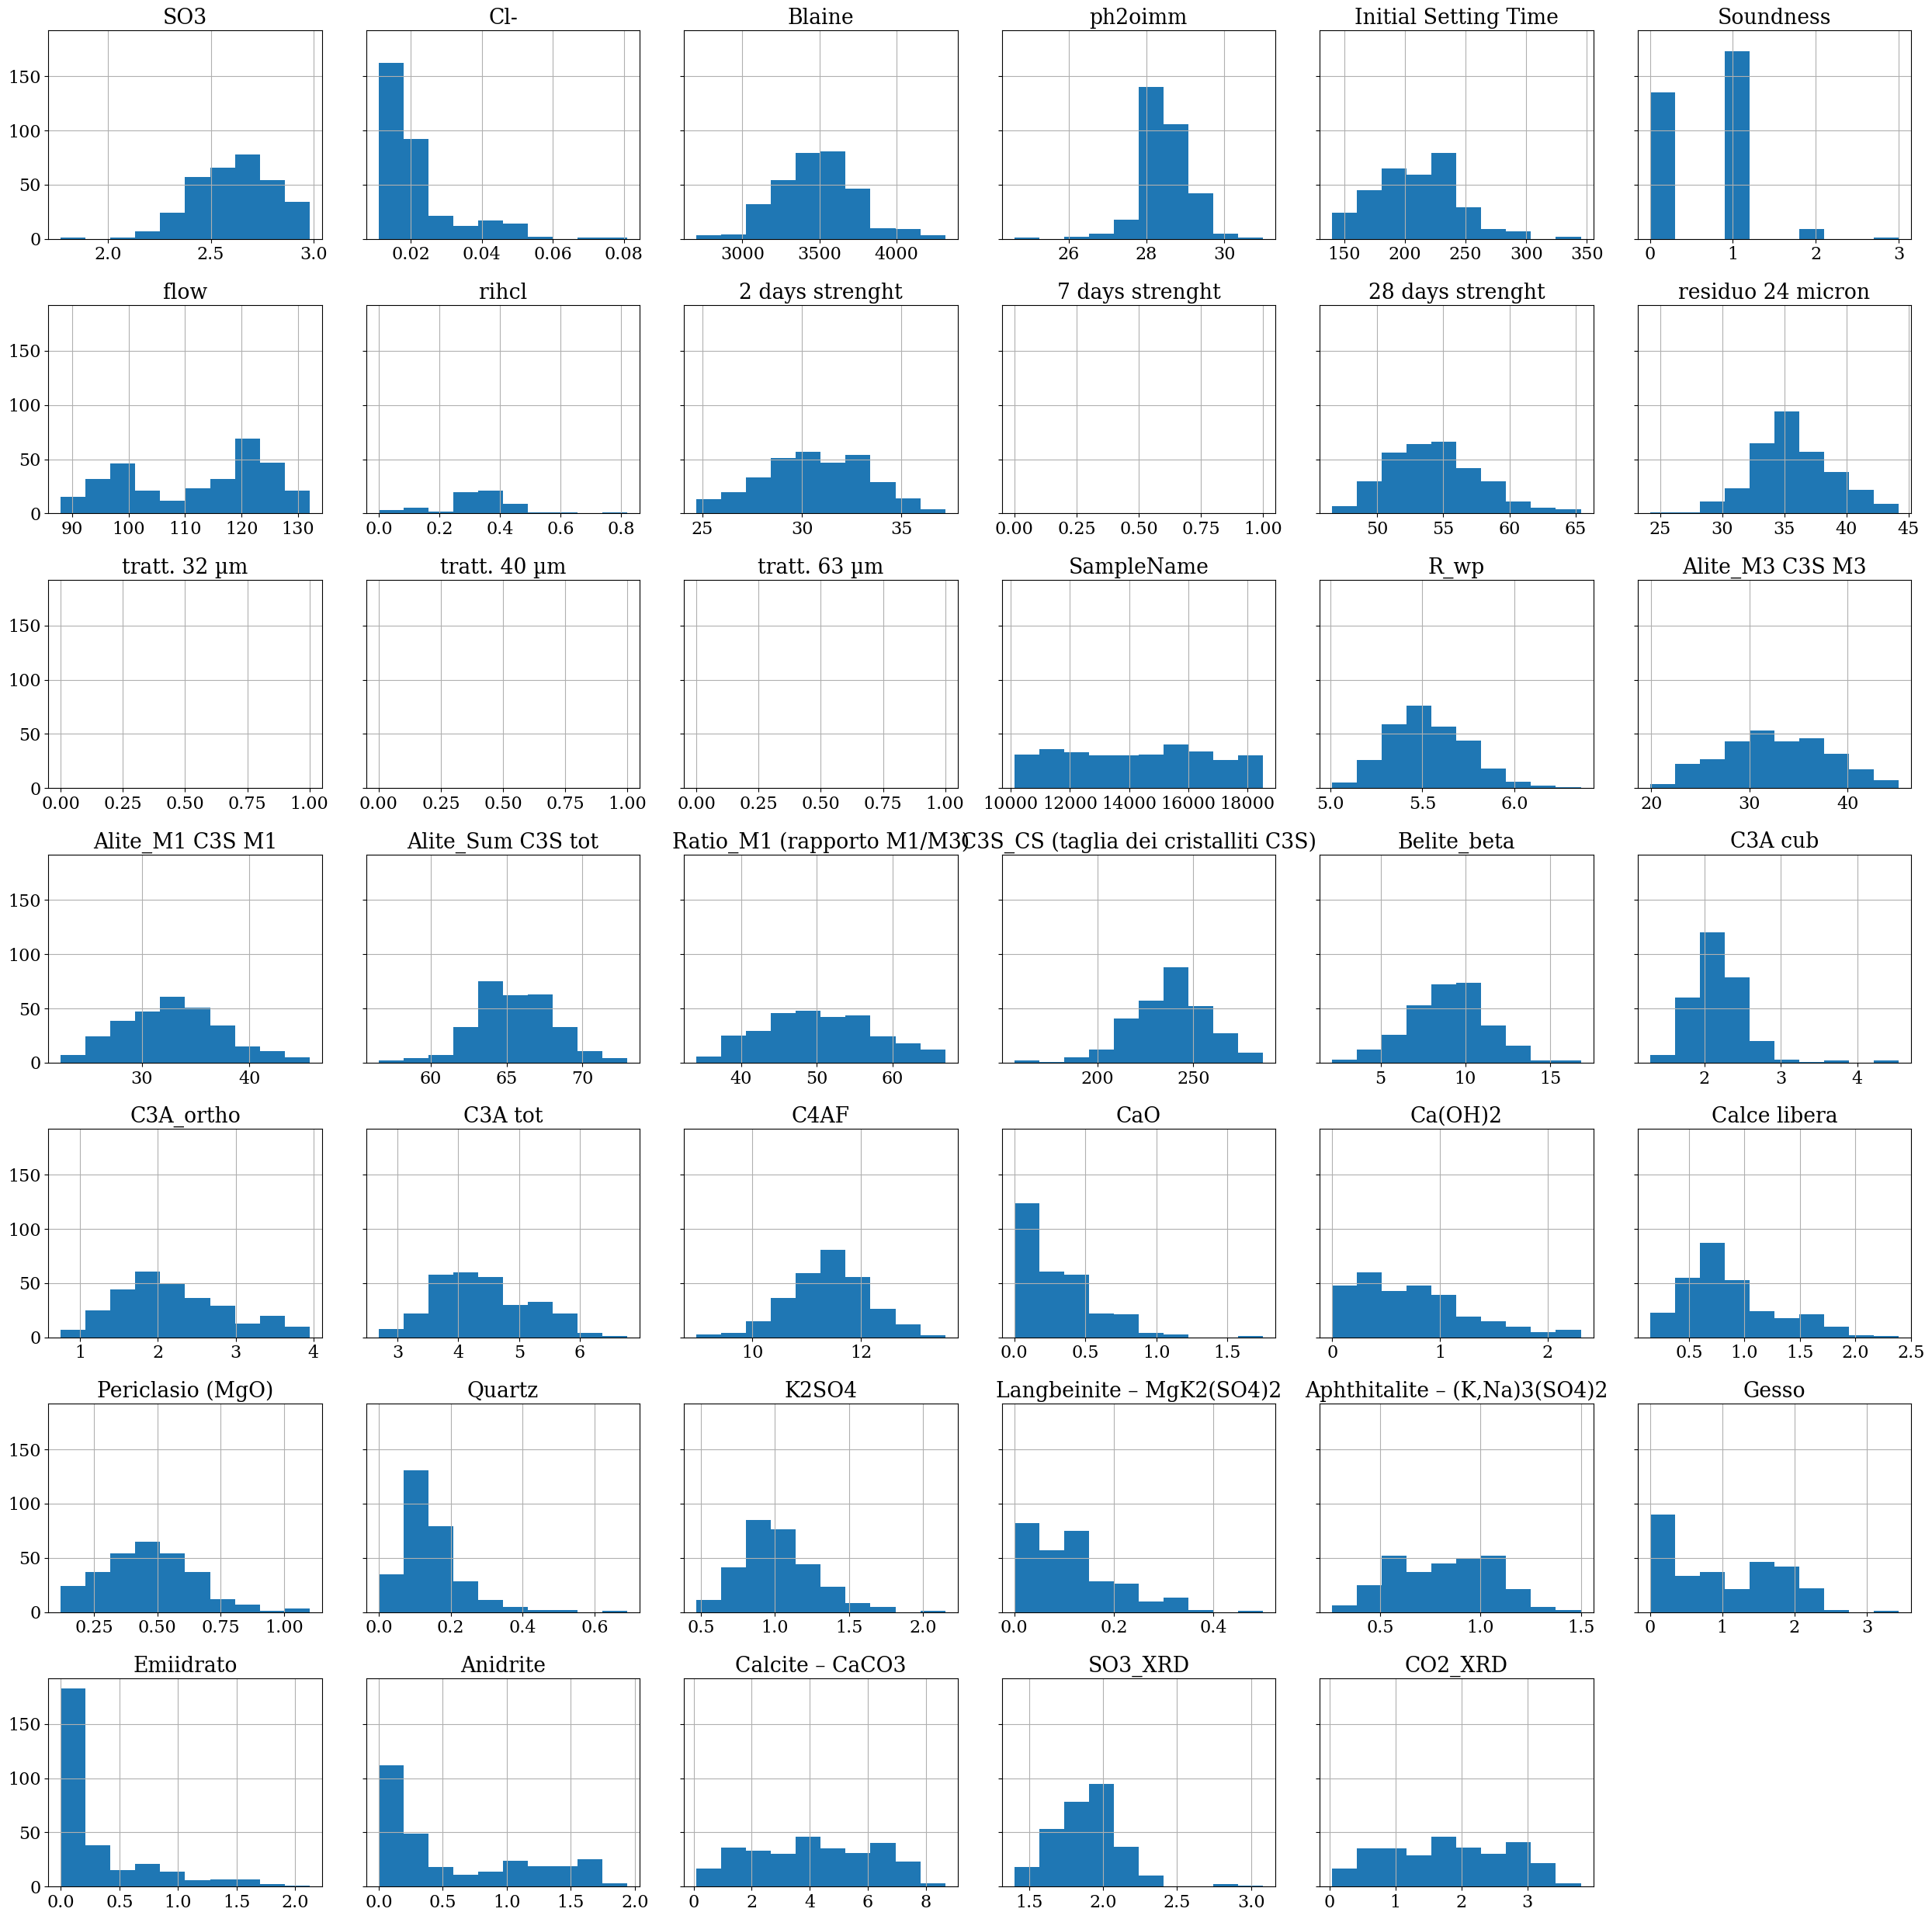

<IPython.core.display.Javascript object>

In [26]:
df.select_dtypes(include="float64").hist(figsize=(25, 25), sharey=True)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

/tmp/ipykernel_46170/1812677160.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_46170/1812677160.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before oper

/tmp/ipykernel_46170/1812677160.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_46170/1812677160.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before oper

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_46170/1812677160.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_46170/1812677160.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(dat

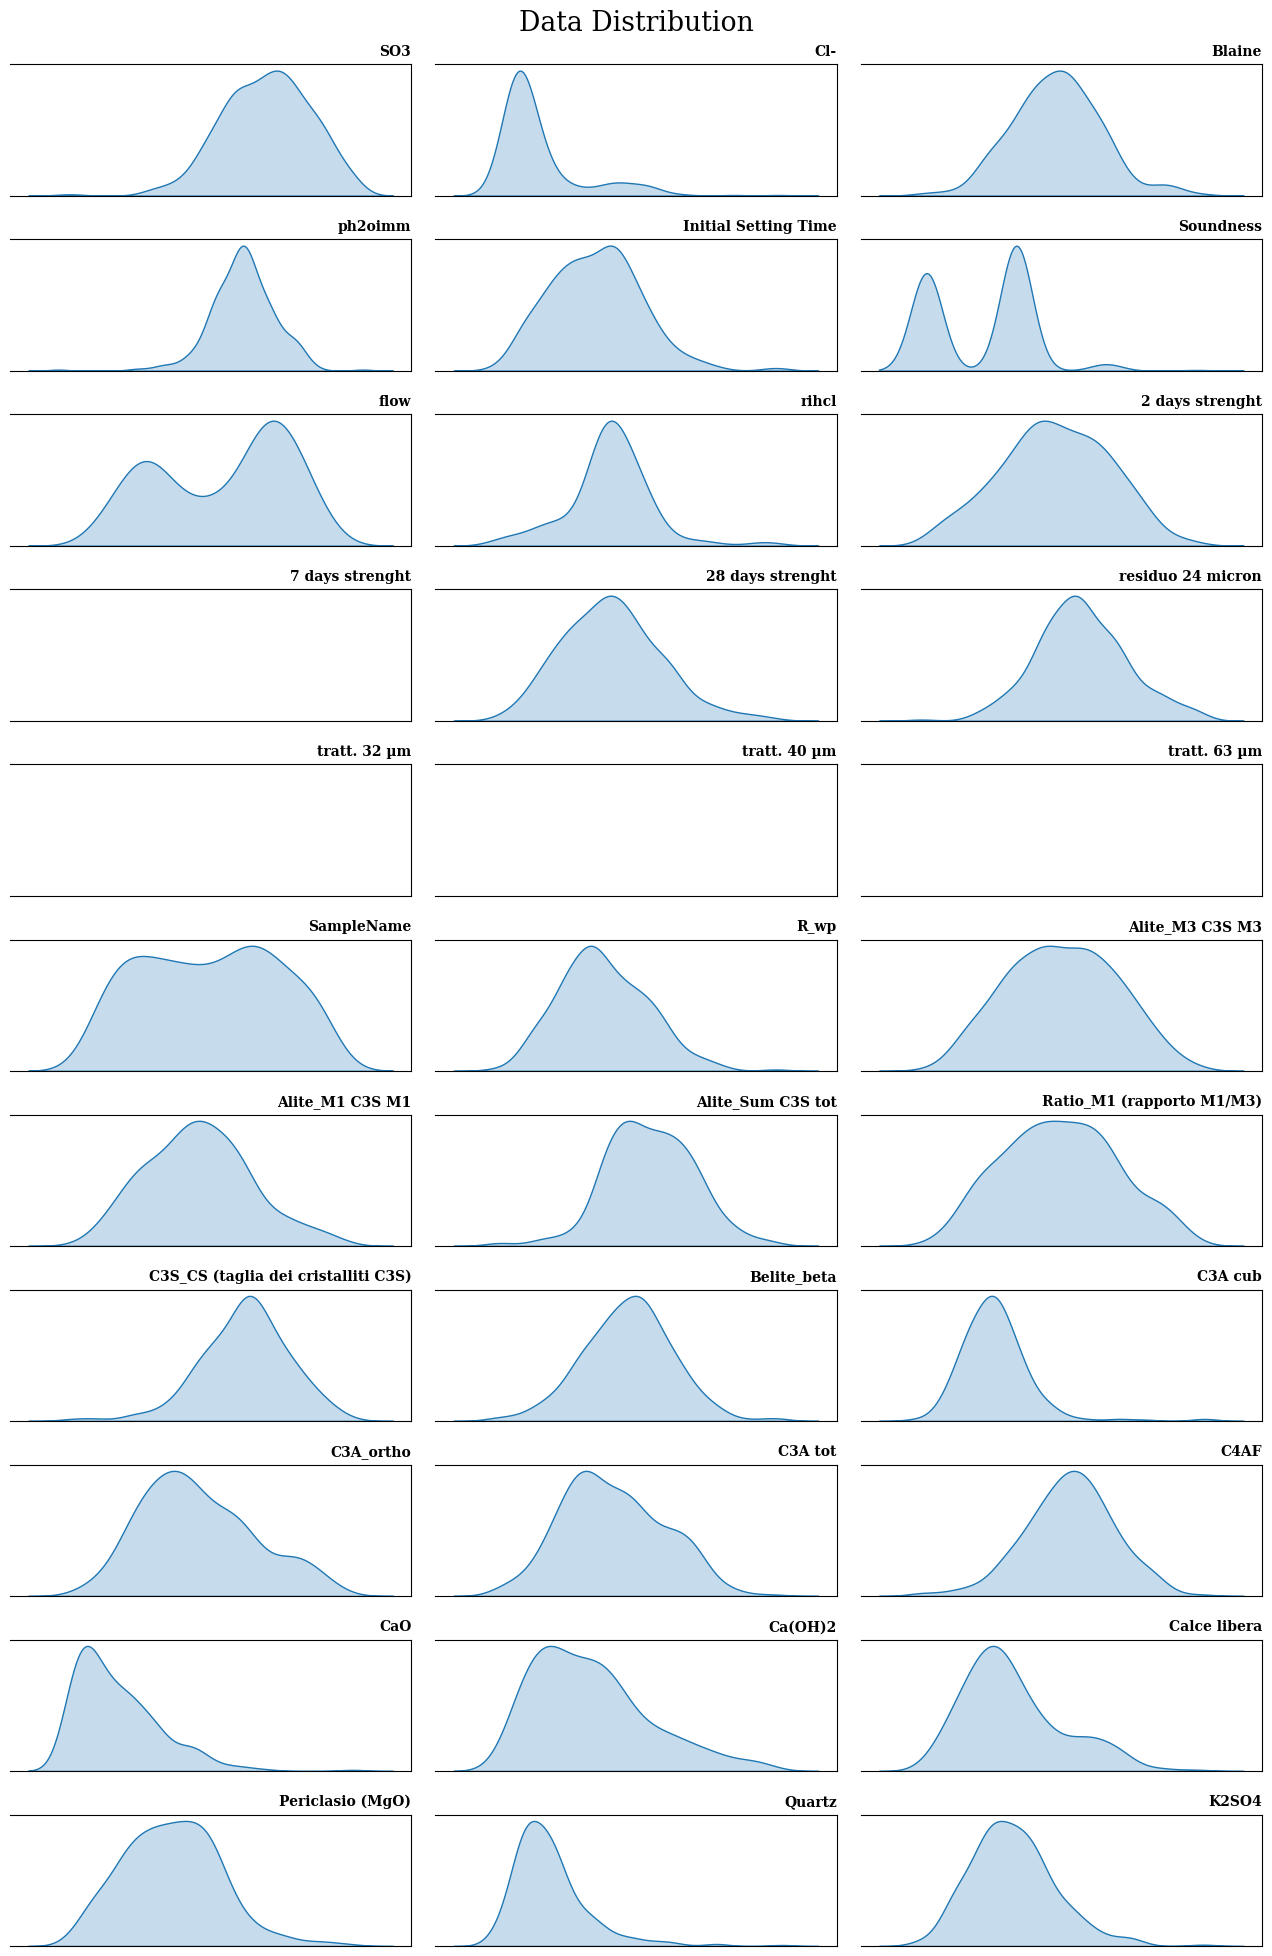

<IPython.core.display.Javascript object>

In [27]:
fig, axes = plt.subplots(11, 3, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

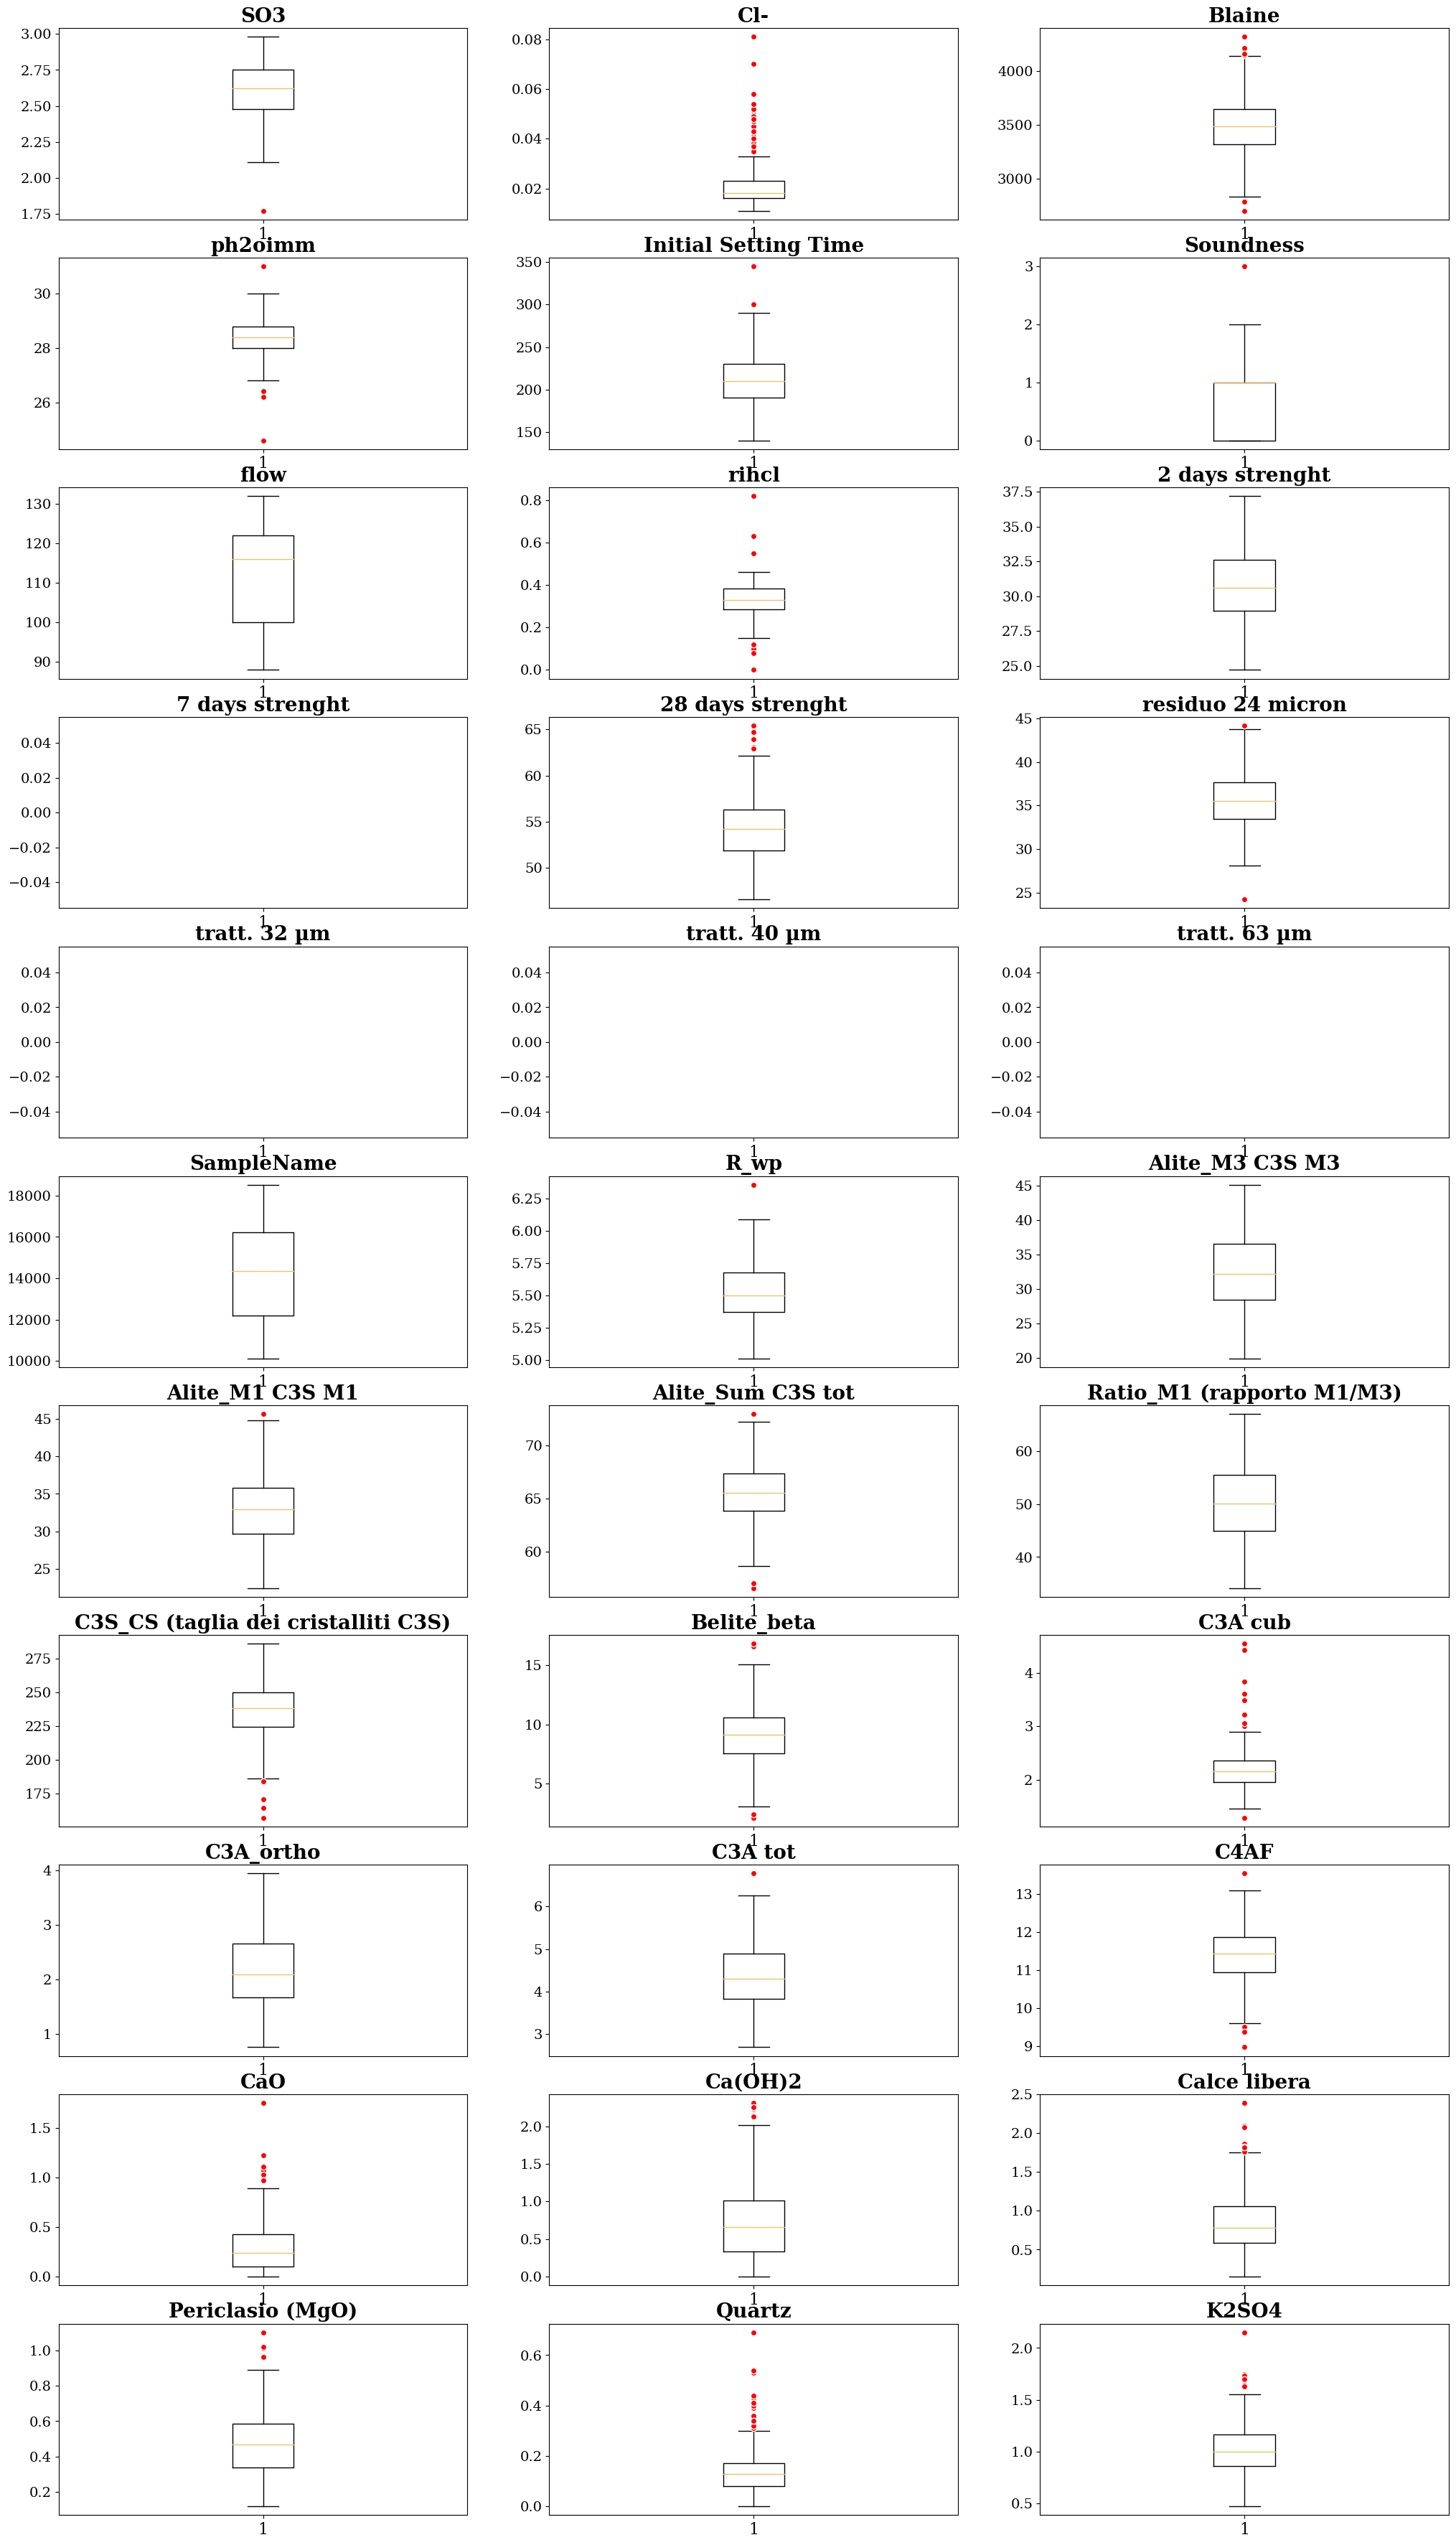

<IPython.core.display.Javascript object>

In [28]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(11, 3, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

<Axes: >

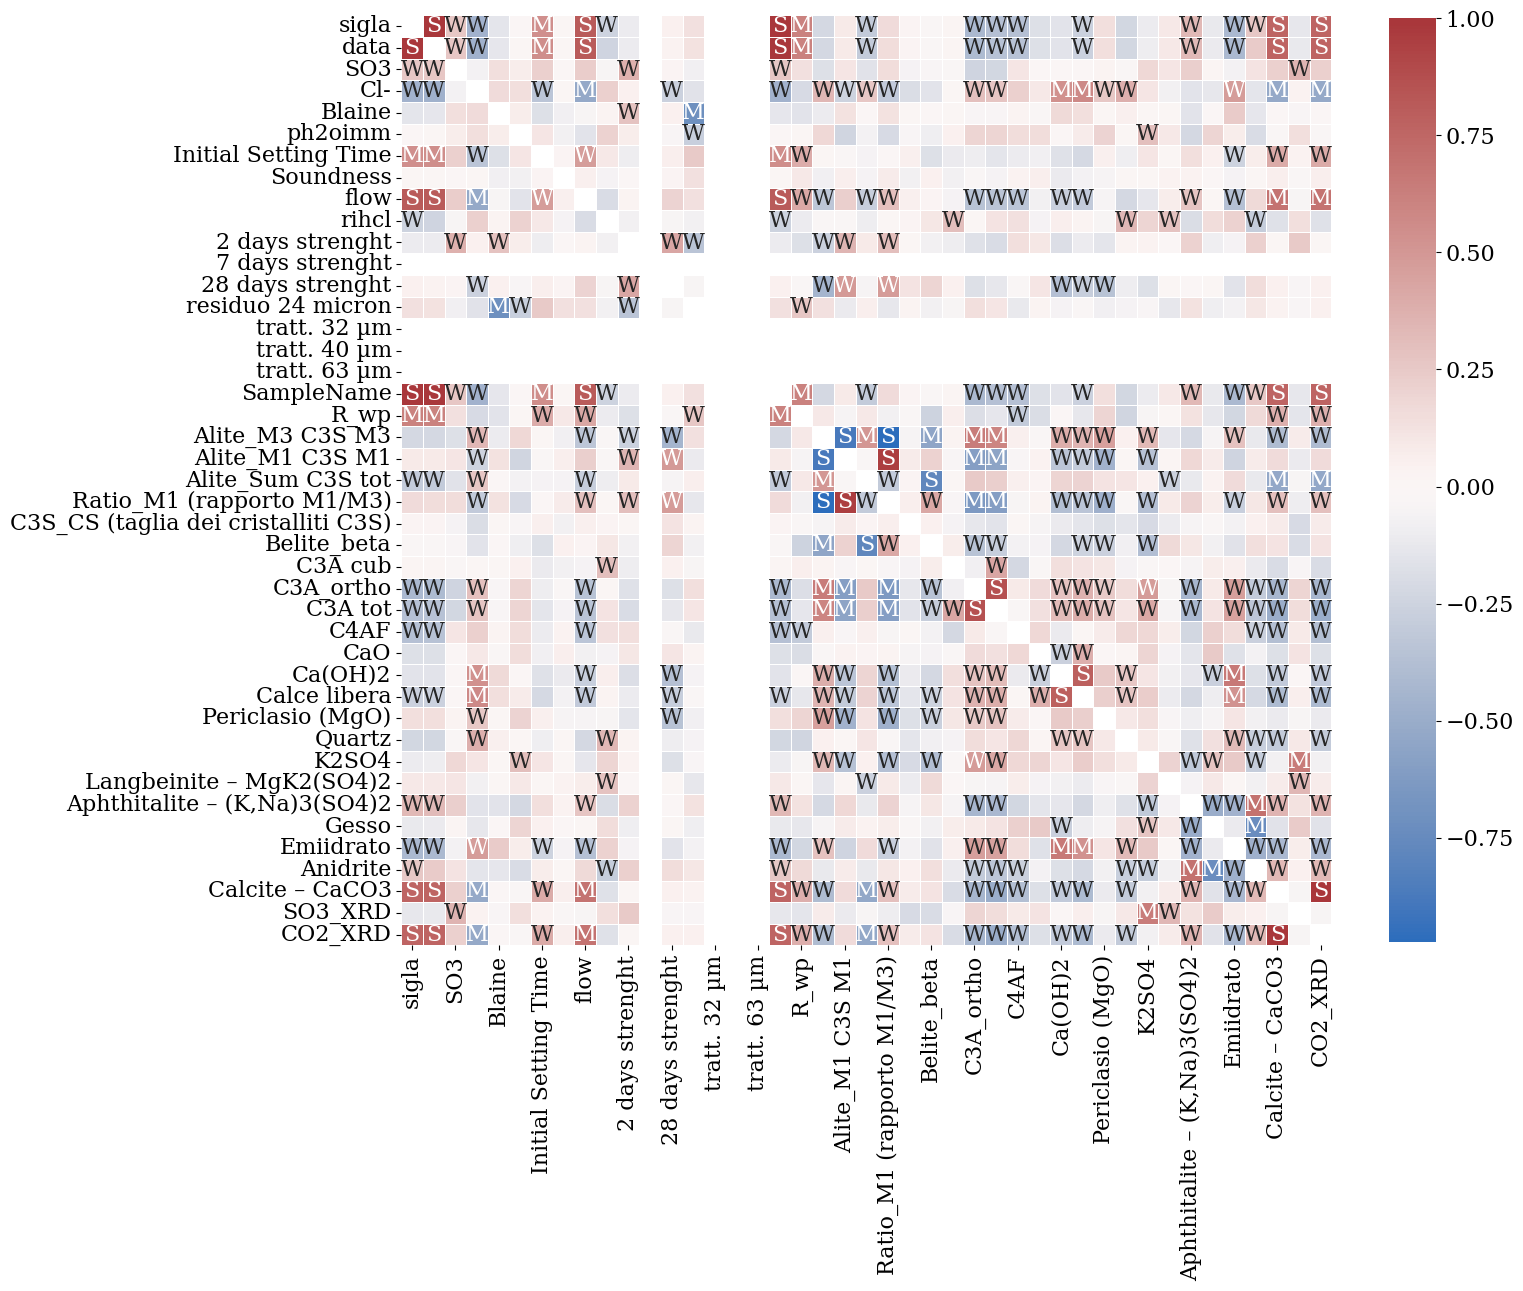

<IPython.core.display.Javascript object>

In [29]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) >= 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

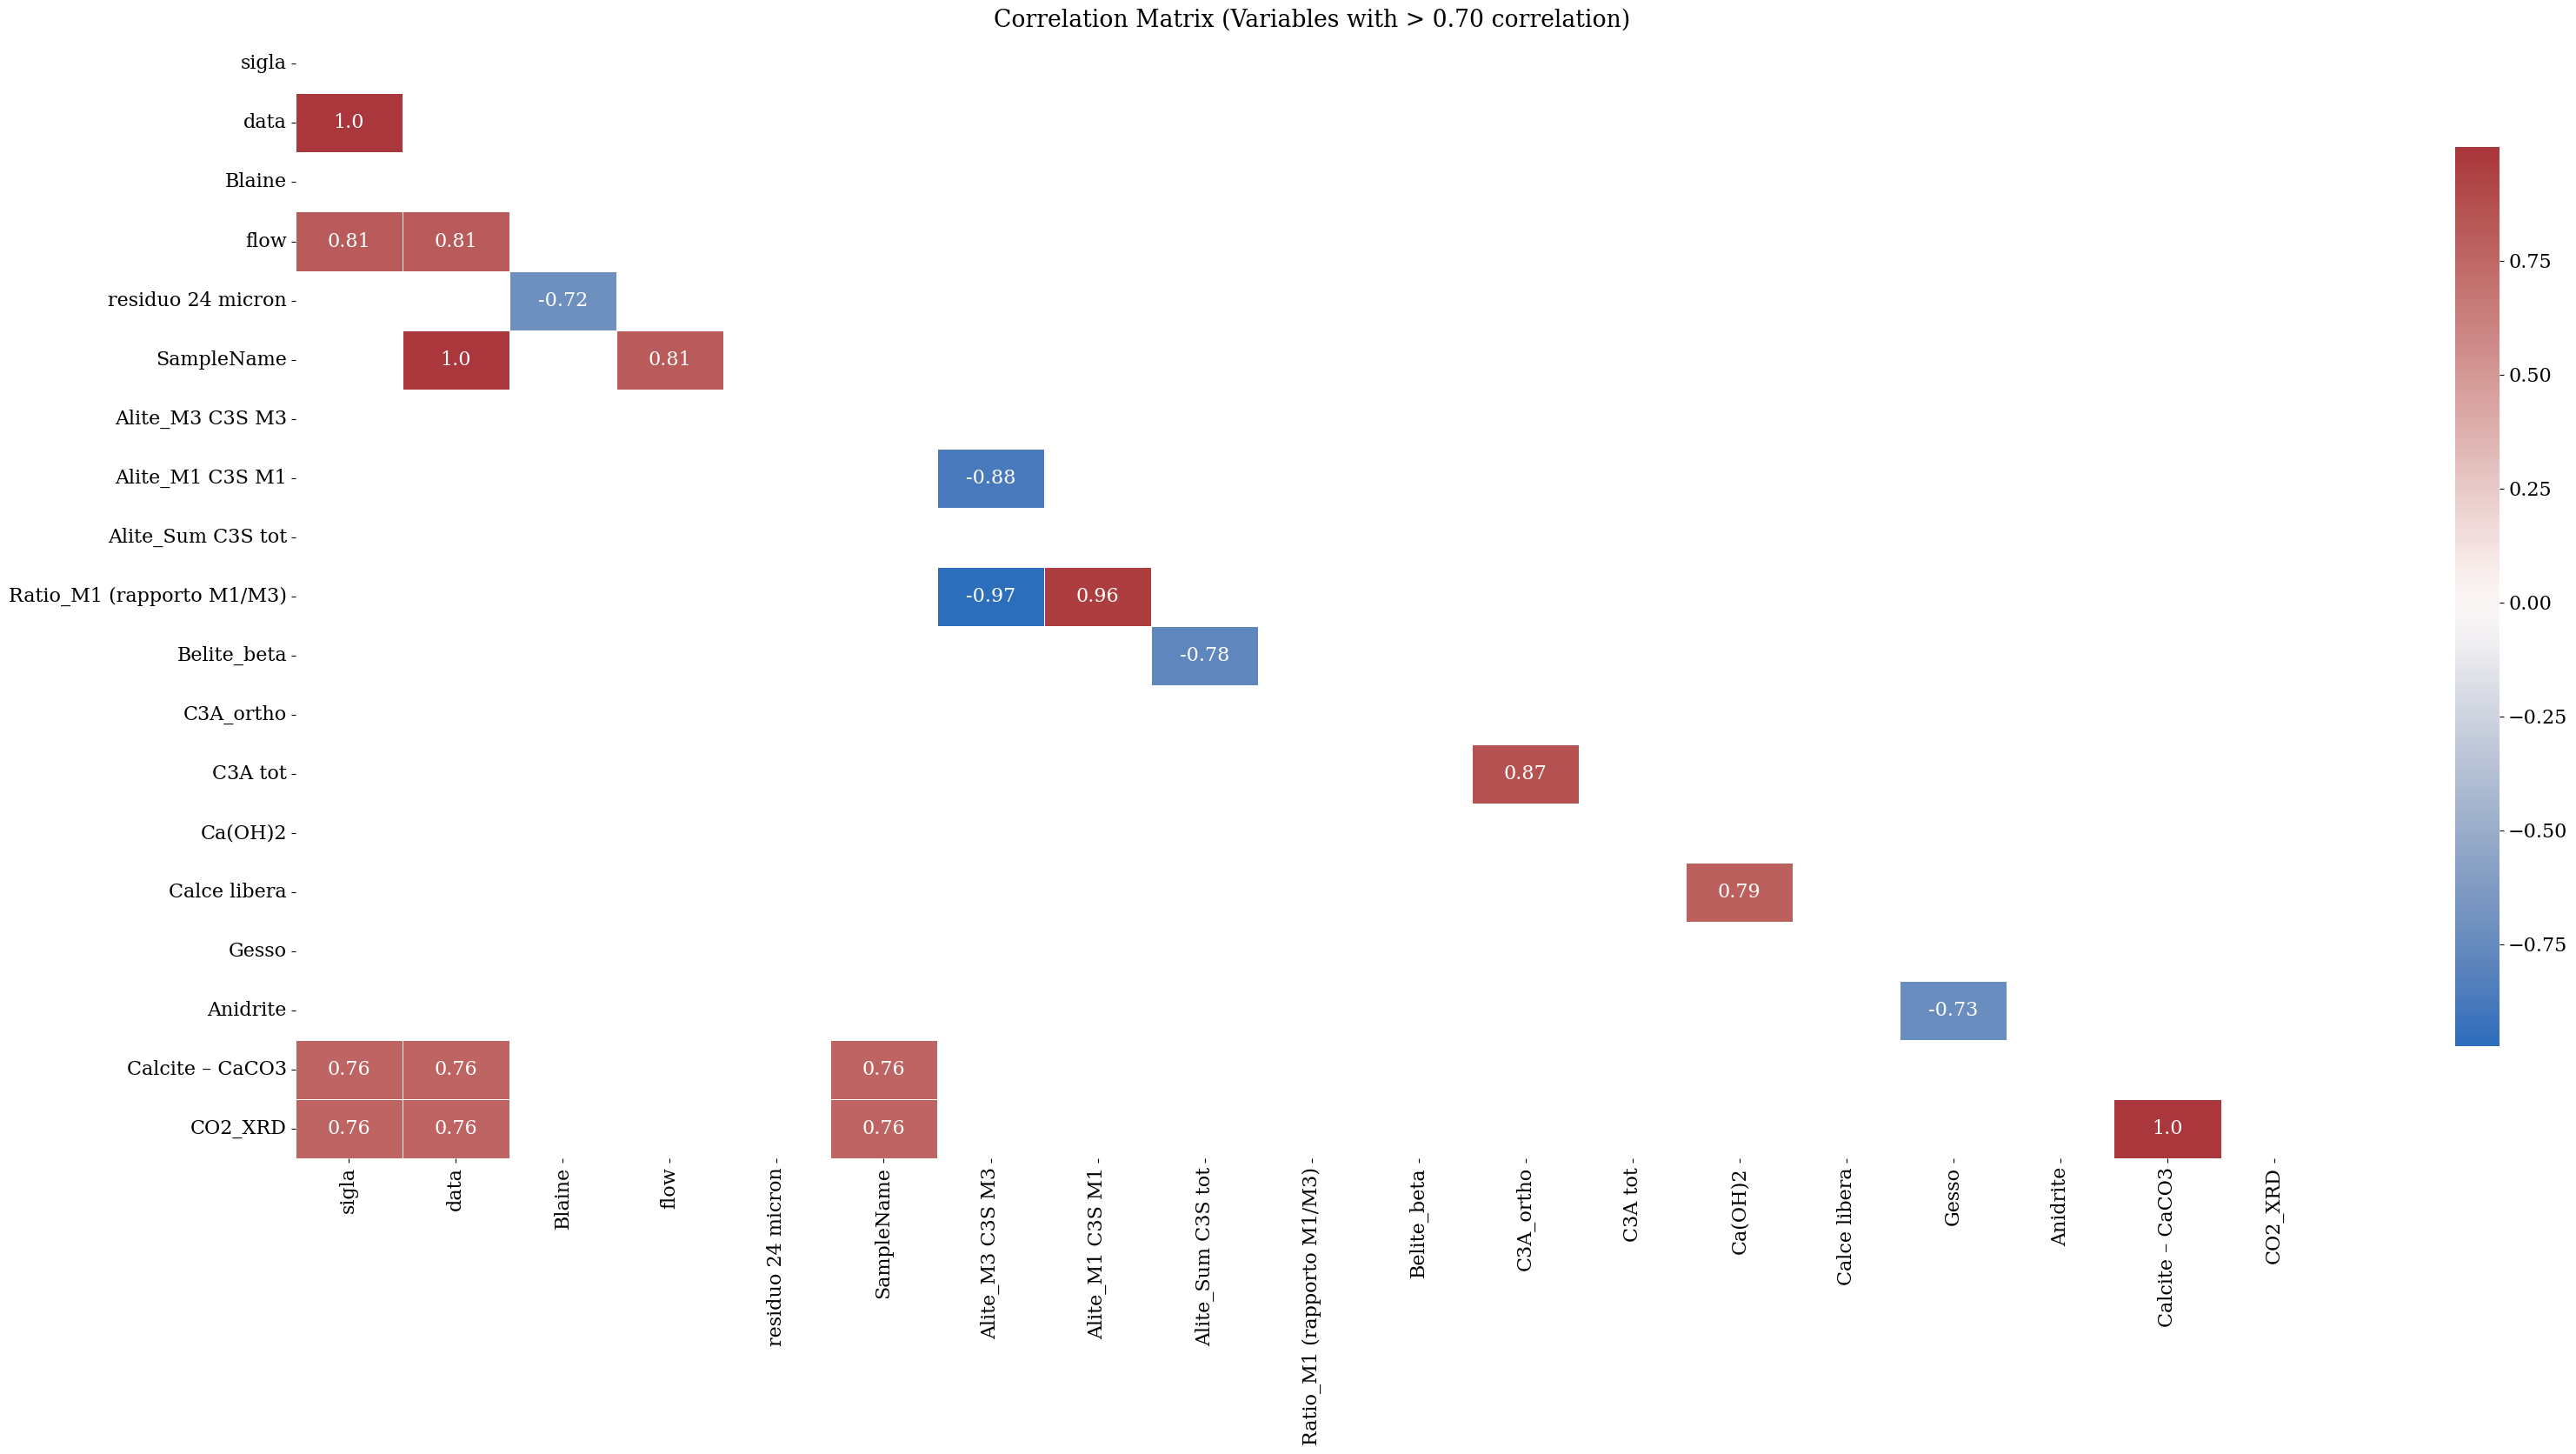

<IPython.core.display.Javascript object>

In [30]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [31]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

sigla              SampleName                   1.000000
Calcite – CaCO3    CO2_XRD                      0.999994
data               SampleName                   0.999608
sigla              data                         0.999607
Alite_M3 C3S M3    Ratio_M1 (rapporto M1/M3)    0.973918
Alite_M1 C3S M1    Ratio_M1 (rapporto M1/M3)    0.960308
Alite_M3 C3S M3    Alite_M1 C3S M1              0.875120
C3A_ortho          C3A tot                      0.867787
data               flow                         0.812294
flow               SampleName                   0.810810
sigla              flow                         0.809750
Ca(OH)2            Calce libera                 0.791079
Alite_Sum C3S tot  Belite_beta                  0.776894
data               CO2_XRD                      0.764222
                   Calcite – CaCO3              0.764130
sigla              CO2_XRD                      0.763957
SampleName         CO2_XRD                      0.763957
                   Calcite – Ca

<IPython.core.display.Javascript object>

In [32]:
sol[sol.index.map(lambda x: "28 days strenght" in x)]

28 days strenght      Alite_M1 C3S M1                        0.489405
                      Ratio_M1 (rapporto M1/M3)              0.479788
                      Alite_M3 C3S M3                        0.449259
2 days strenght       28 days strenght                       0.427781
28 days strenght      Ca(OH)2                                0.365524
                      Periclasio (MgO)                       0.351514
                      Calce libera                           0.281890
Cl-                   28 days strenght                       0.261902
flow                  28 days strenght                       0.202866
28 days strenght      Belite_beta                            0.192485
                      C3A_ortho                              0.173296
                      K2SO4                                  0.172592
                      Emiidrato                              0.156383
                      Anidrite                               0.146615
                    

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

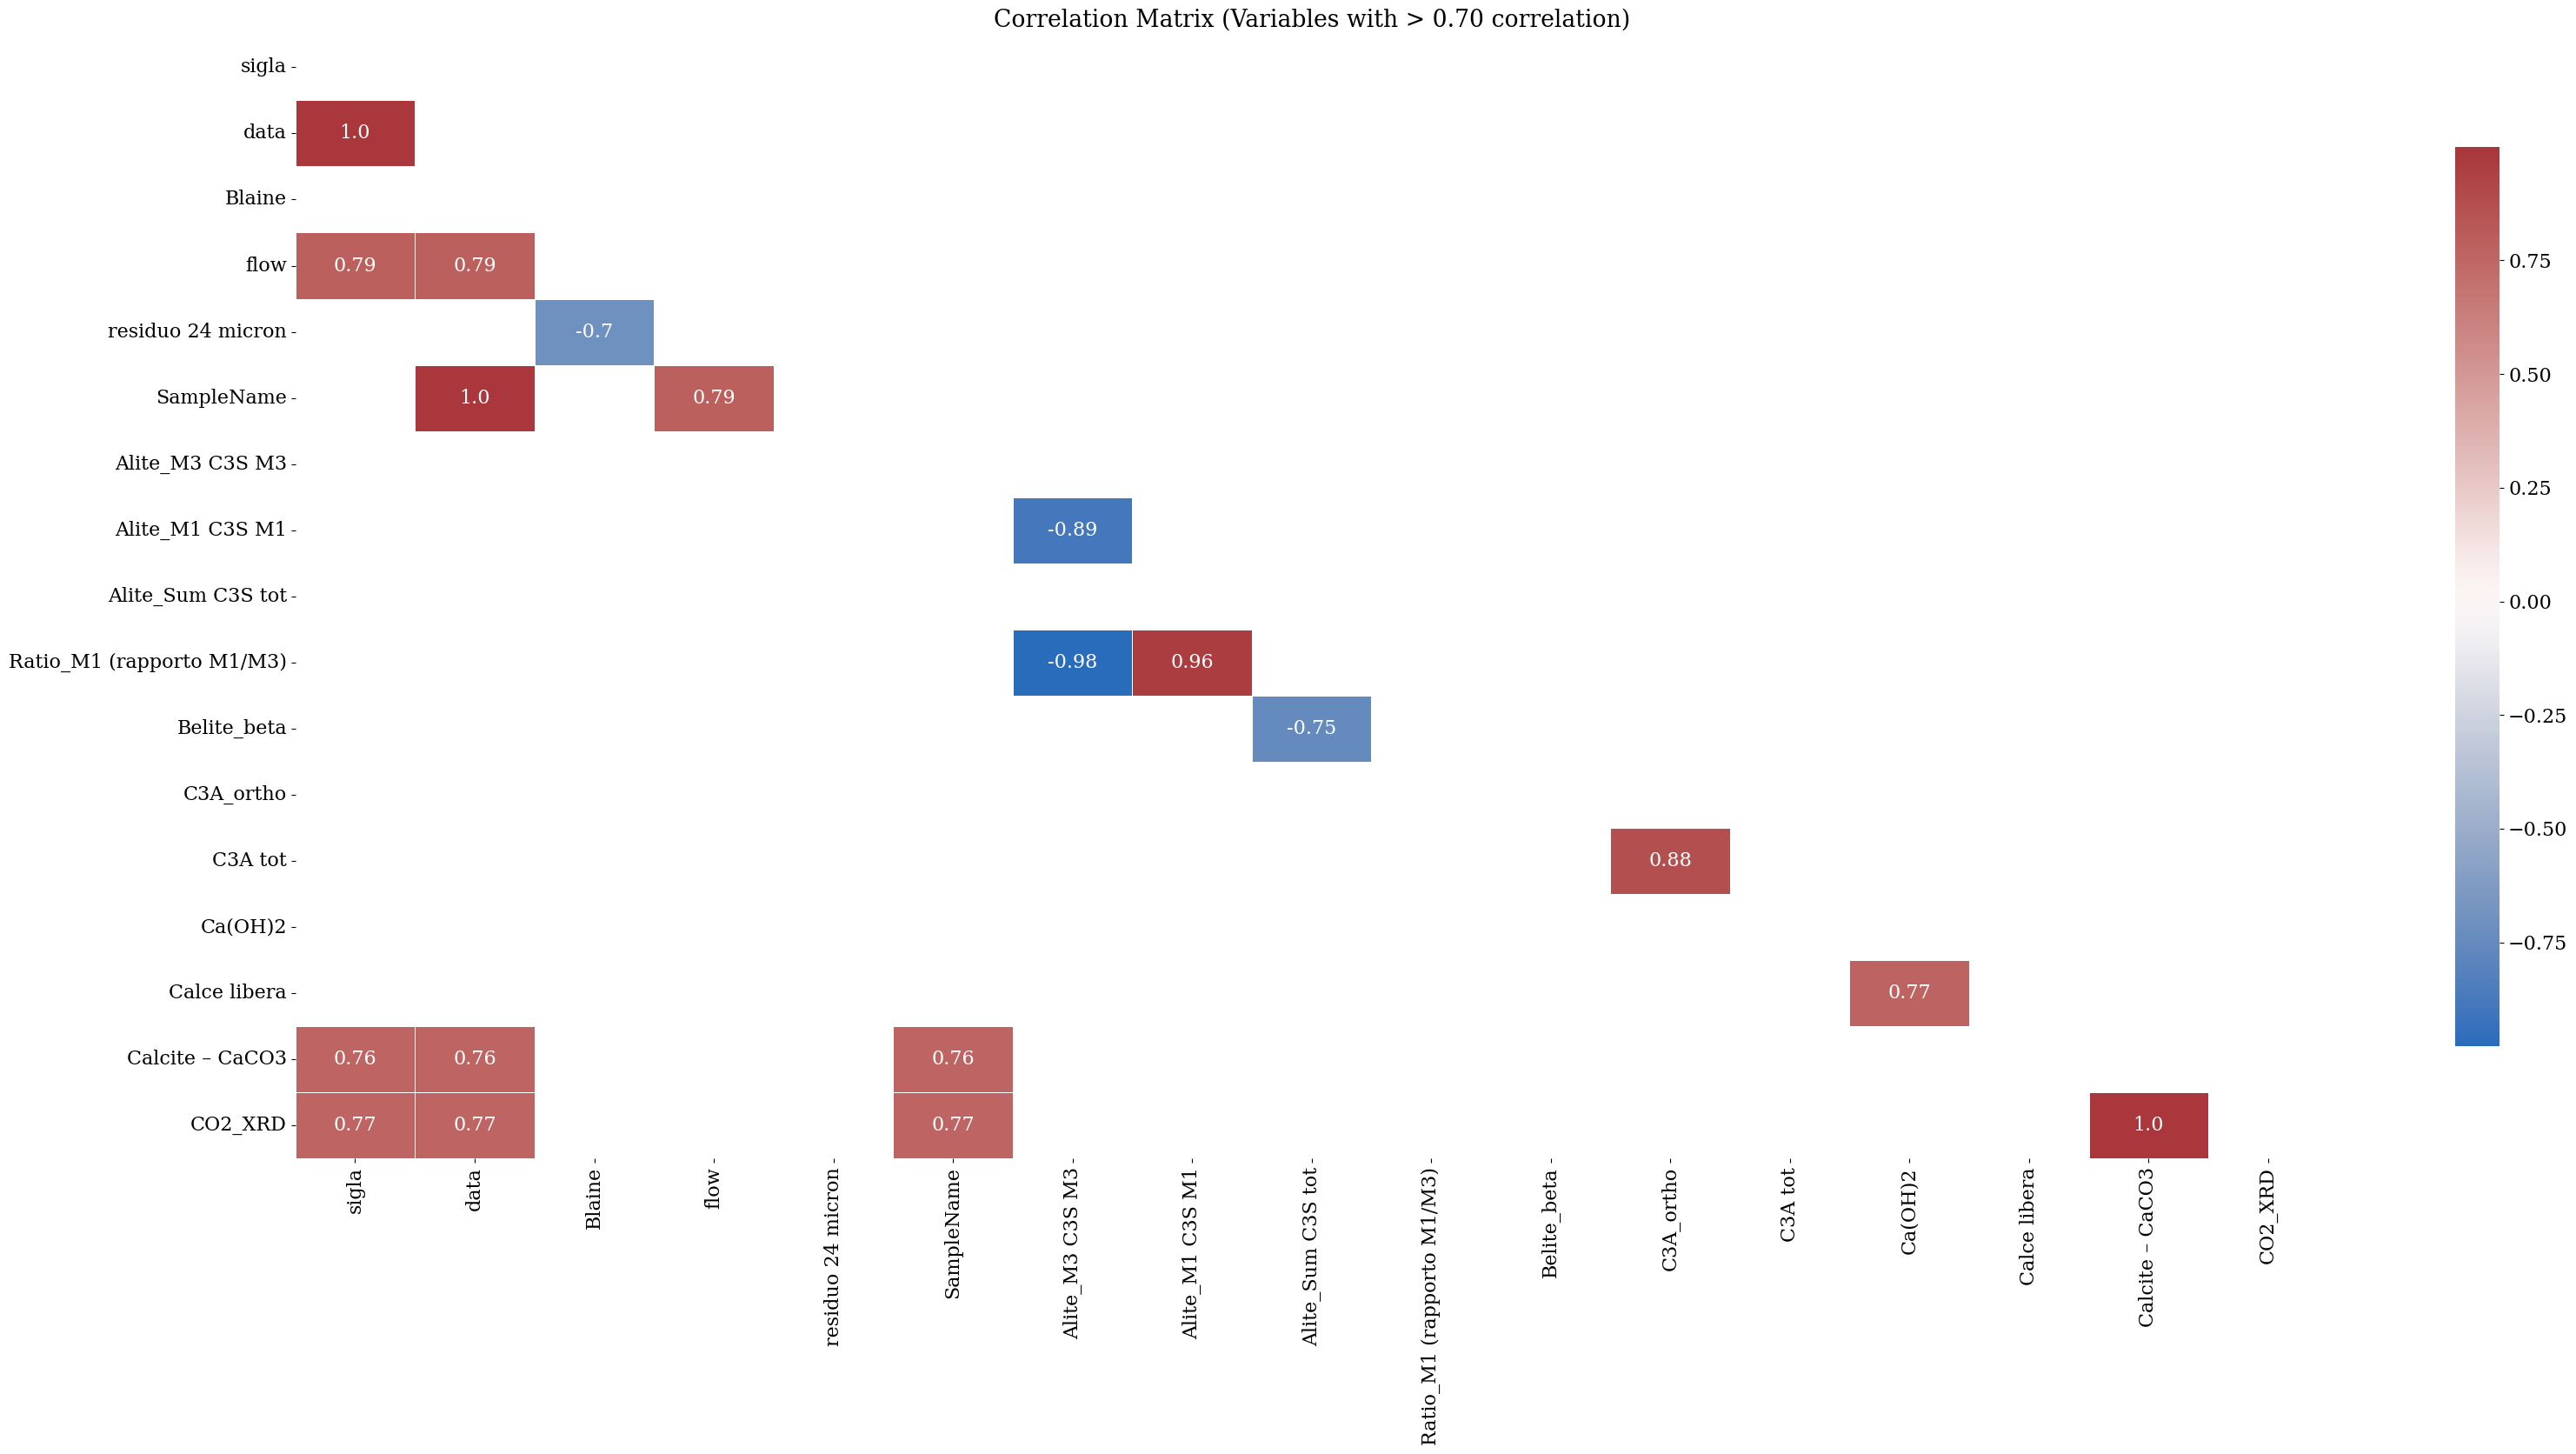

<IPython.core.display.Javascript object>

In [33]:
df_corr = df.select_dtypes(exclude=object).corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [34]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="spearman").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

sigla              SampleName                   1.000000
Calcite – CaCO3    CO2_XRD                      0.999982
sigla              data                         0.999967
data               SampleName                   0.999967
Alite_M3 C3S M3    Ratio_M1 (rapporto M1/M3)    0.978083
Alite_M1 C3S M1    Ratio_M1 (rapporto M1/M3)    0.962141
Alite_M3 C3S M3    Alite_M1 C3S M1              0.888868
C3A_ortho          C3A tot                      0.875683
flow               SampleName                   0.786824
data               flow                         0.785285
sigla              flow                         0.785283
Ca(OH)2            Calce libera                 0.770366
sigla              CO2_XRD                      0.765118
SampleName         CO2_XRD                      0.765118
data               CO2_XRD                      0.765103
SampleName         Calcite – CaCO3              0.764965
sigla              Calcite – CaCO3              0.764965
data               Calcite – Ca

<IPython.core.display.Javascript object>

In [35]:
sol[sol.index.map(lambda x: "28 days strenght" in x)]

2 days strenght       28 days strenght                       0.455326
28 days strenght      Alite_M1 C3S M1                        0.435215
                      Ratio_M1 (rapporto M1/M3)              0.426084
                      Alite_M3 C3S M3                        0.407582
                      Ca(OH)2                                0.392320
                      Periclasio (MgO)                       0.326981
Cl-                   28 days strenght                       0.306417
28 days strenght      Calce libera                           0.296168
flow                  28 days strenght                       0.197502
28 days strenght      C3A_ortho                              0.183399
                      Belite_beta                            0.183302
                      Anidrite                               0.178654
                      CaO                                    0.171479
                      K2SO4                                  0.156836
                    

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

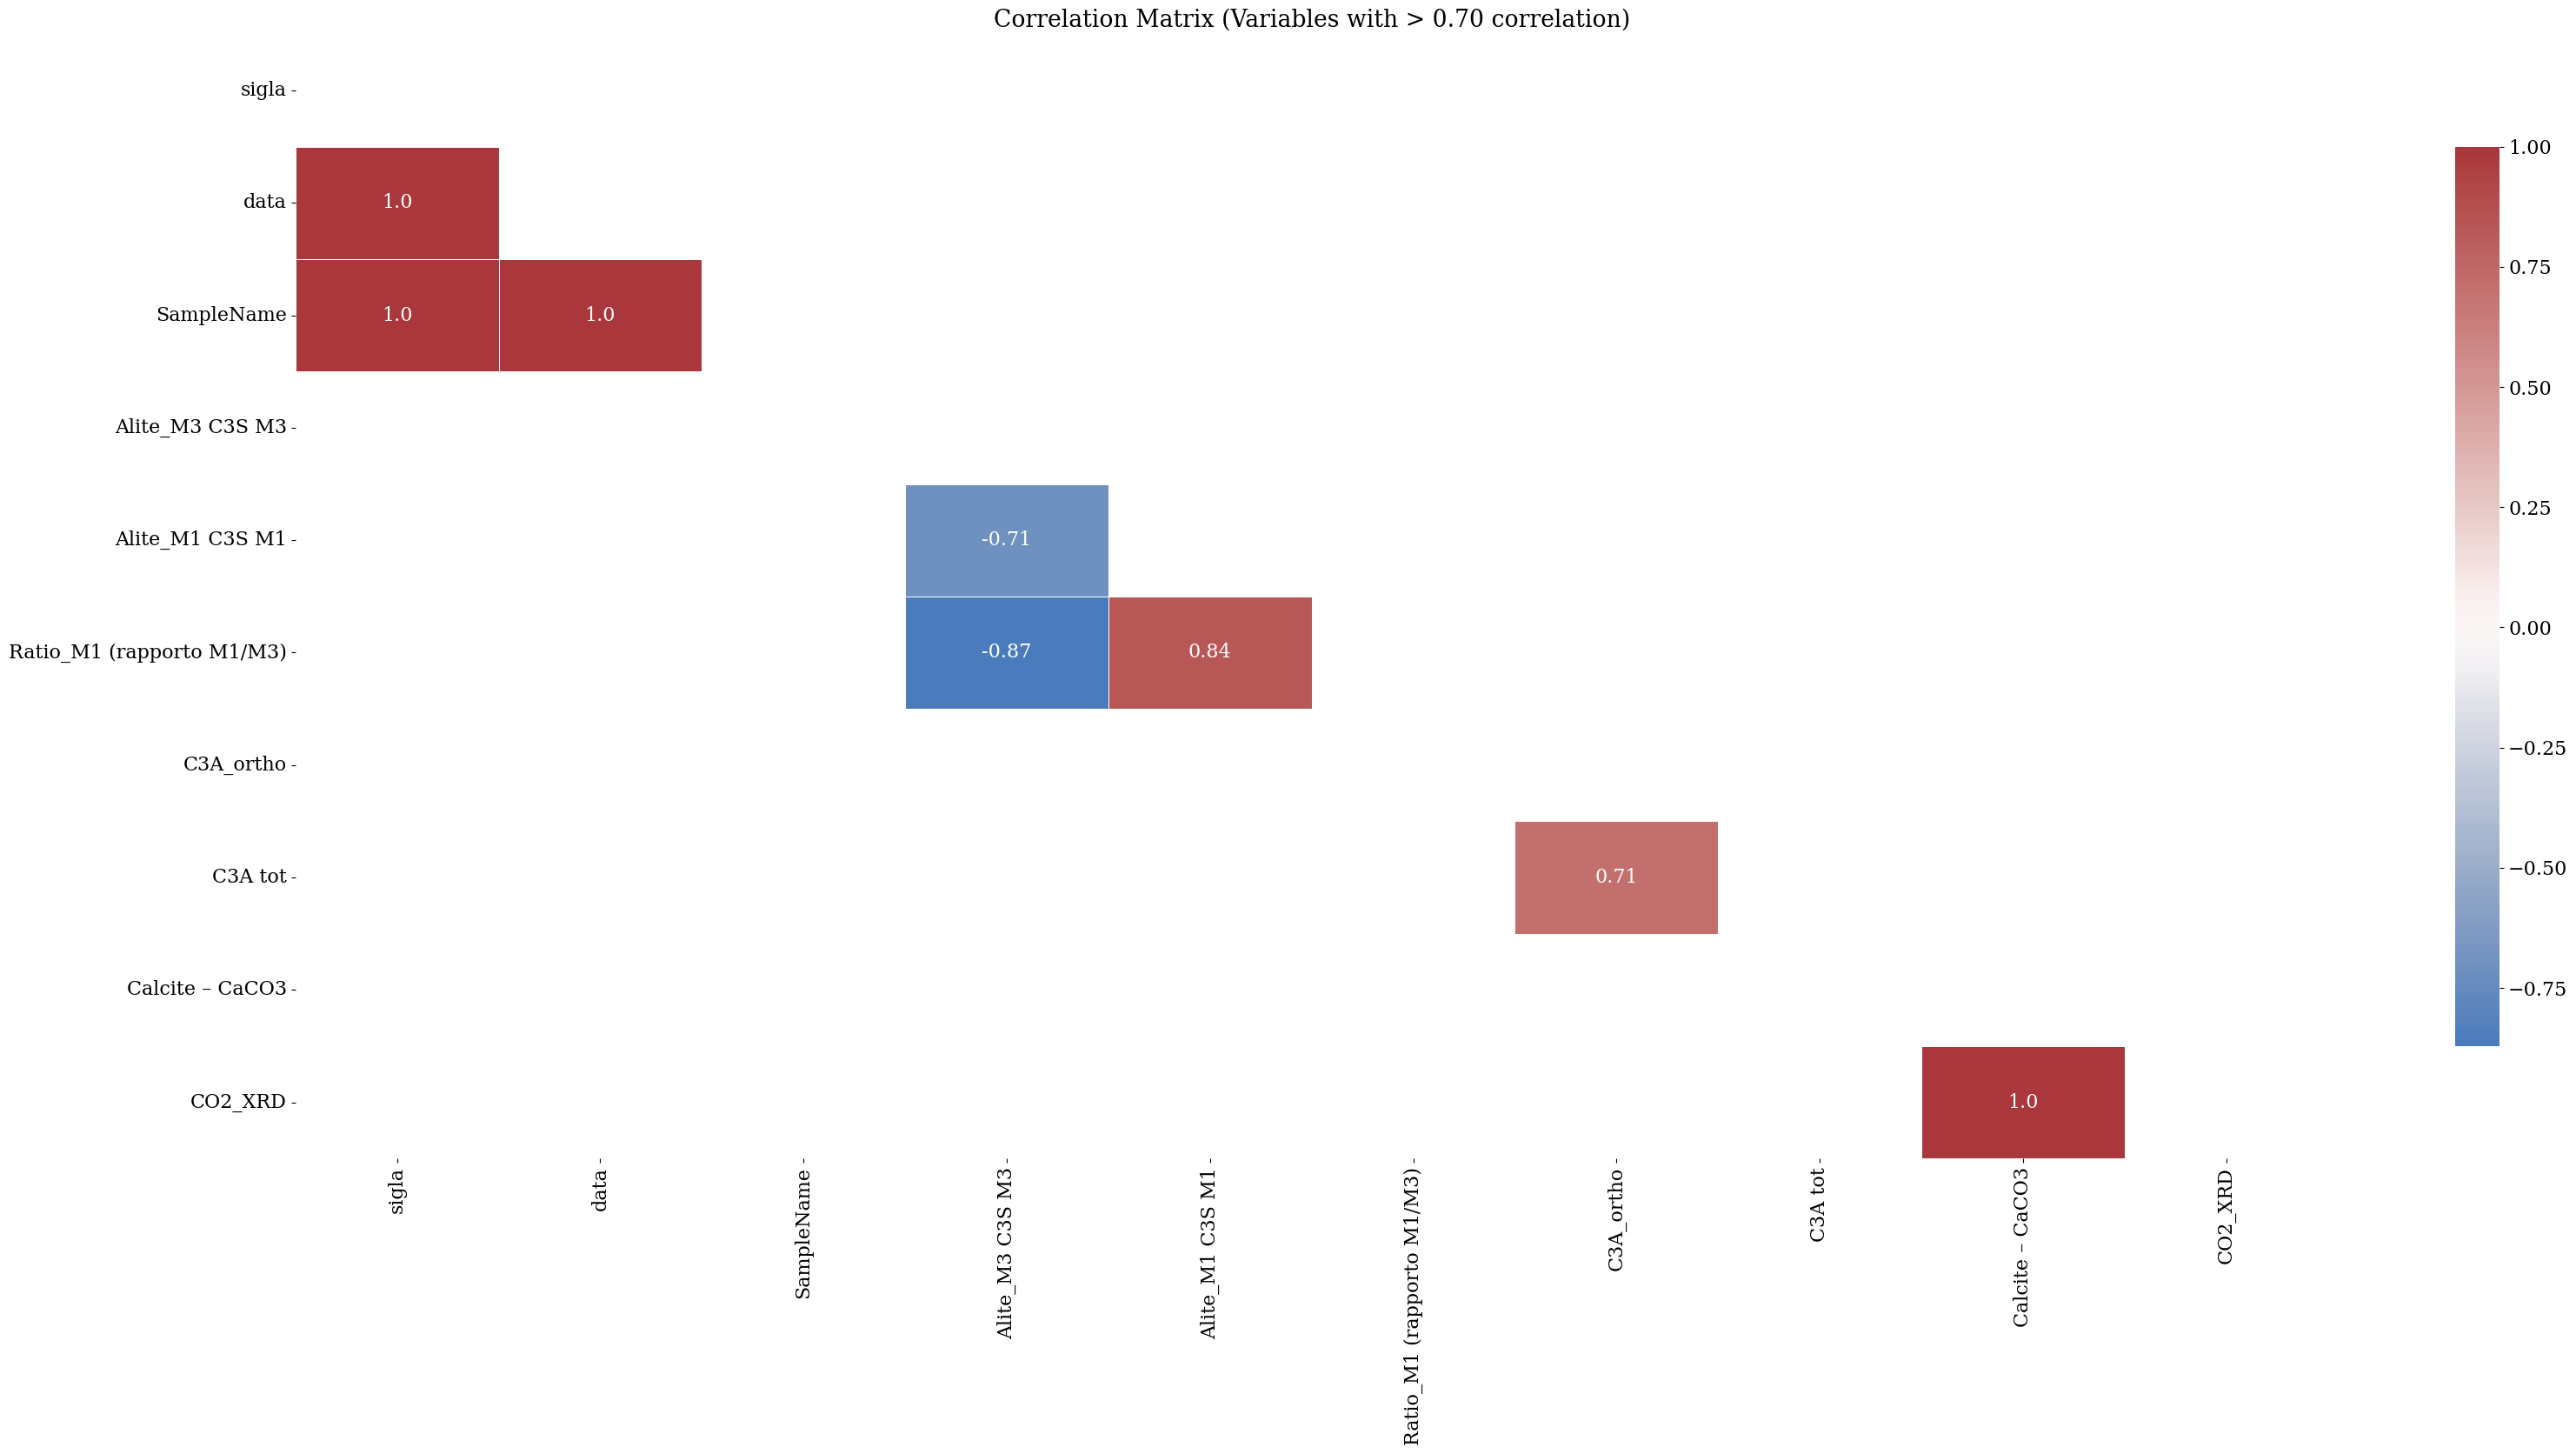

<IPython.core.display.Javascript object>

In [36]:


df_corr = df.select_dtypes(exclude=object).corr(method="kendall")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()



In [37]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="kendall").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

sigla            SampleName                   1.000000
                 data                         0.999081
data             SampleName                   0.999075
Calcite – CaCO3  CO2_XRD                      0.998849
Alite_M3 C3S M3  Ratio_M1 (rapporto M1/M3)    0.871004
Alite_M1 C3S M1  Ratio_M1 (rapporto M1/M3)    0.837321
C3A_ortho        C3A tot                      0.713660
Alite_M3 C3S M3  Alite_M1 C3S M1              0.707821
dtype: float64

<IPython.core.display.Javascript object>

In [38]:
sol[sol.index.map(lambda x: "28 days strenght" in x)]

2 days strenght       28 days strenght                       0.313201
28 days strenght      Alite_M1 C3S M1                        0.305702
                      Ratio_M1 (rapporto M1/M3)              0.299861
                      Alite_M3 C3S M3                        0.286660
                      Ca(OH)2                                0.274313
                      Periclasio (MgO)                       0.229444
Cl-                   28 days strenght                       0.219892
28 days strenght      Calce libera                           0.199415
flow                  28 days strenght                       0.130344
28 days strenght      Anidrite                               0.123401
                      C3A_ortho                              0.120723
                      Belite_beta                            0.120299
                      CaO                                    0.112193
                      K2SO4                                  0.108656
                    

<IPython.core.display.Javascript object>

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

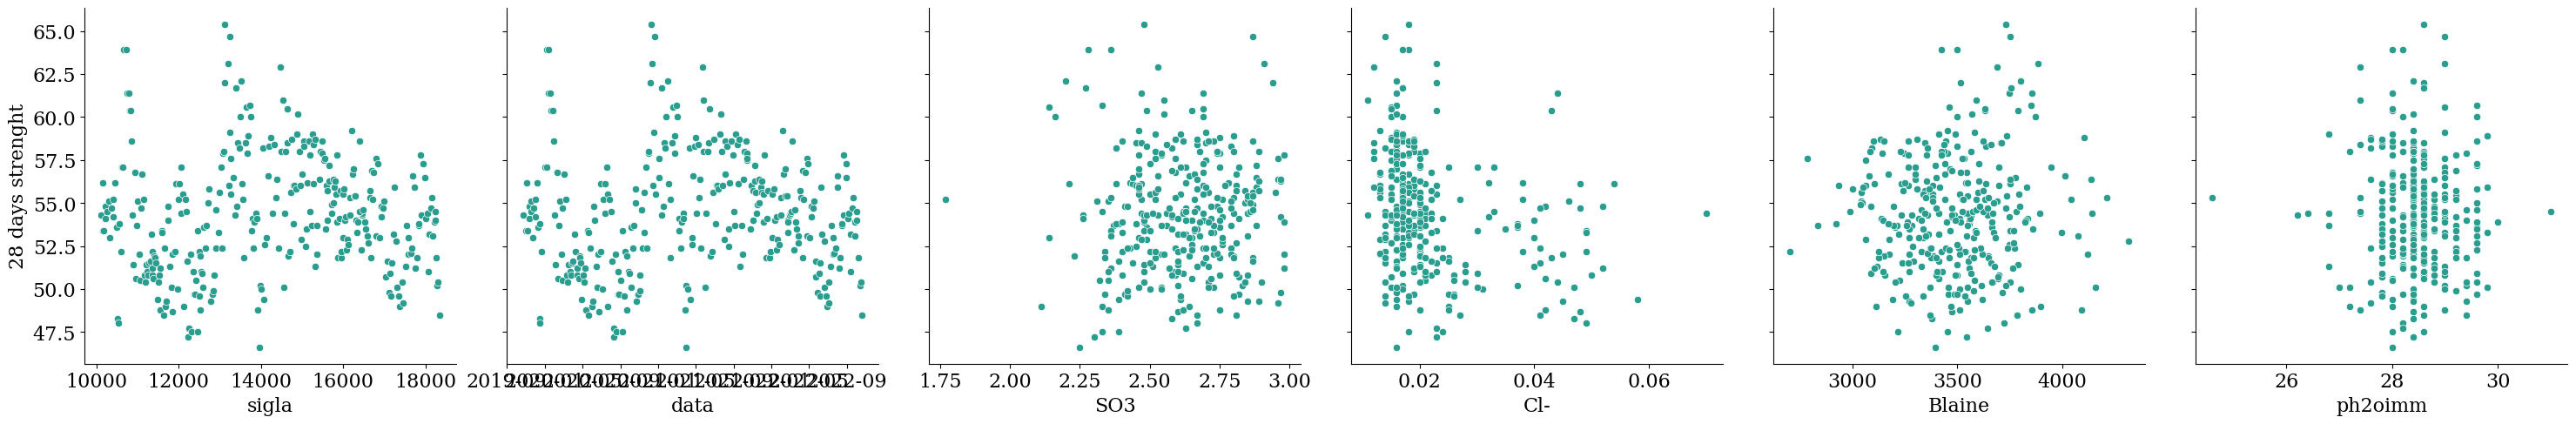

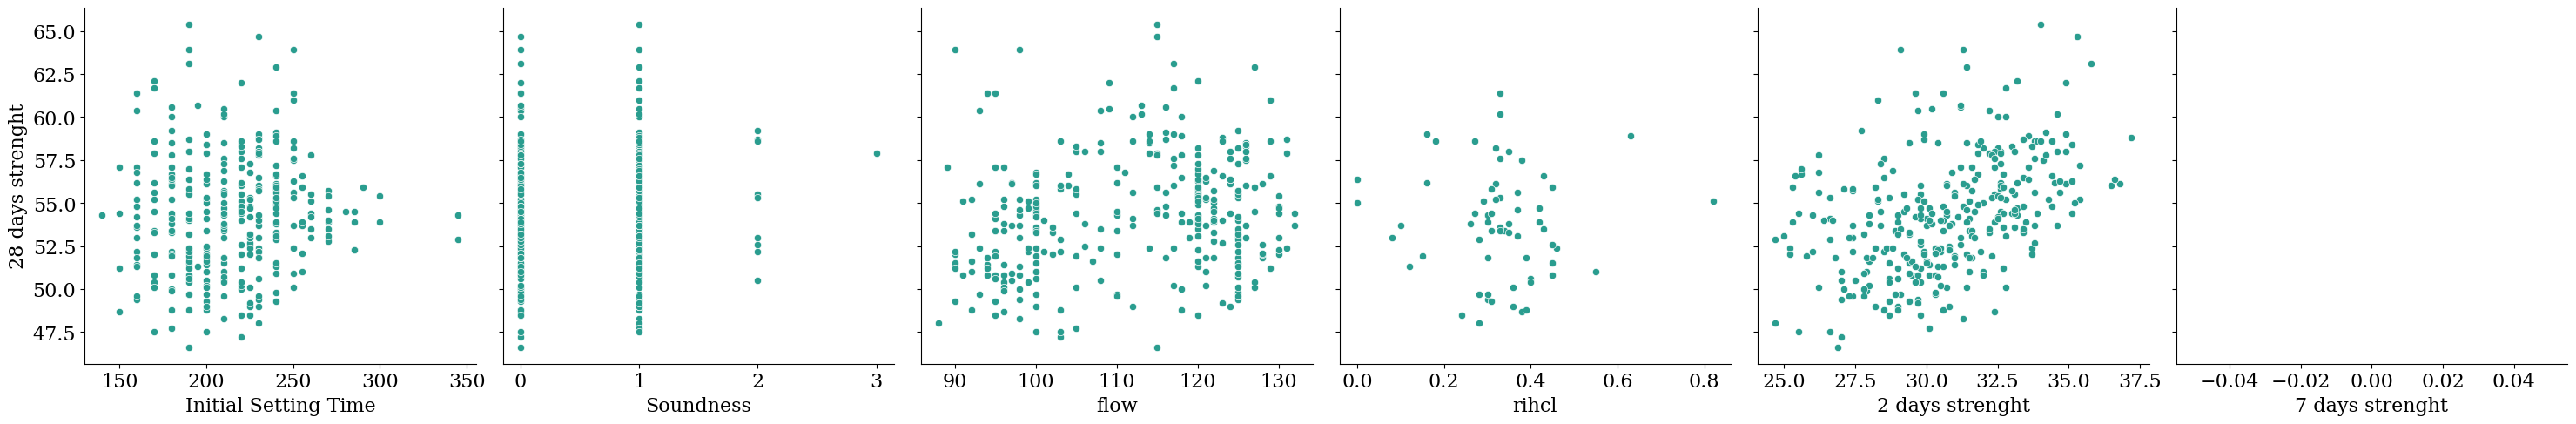

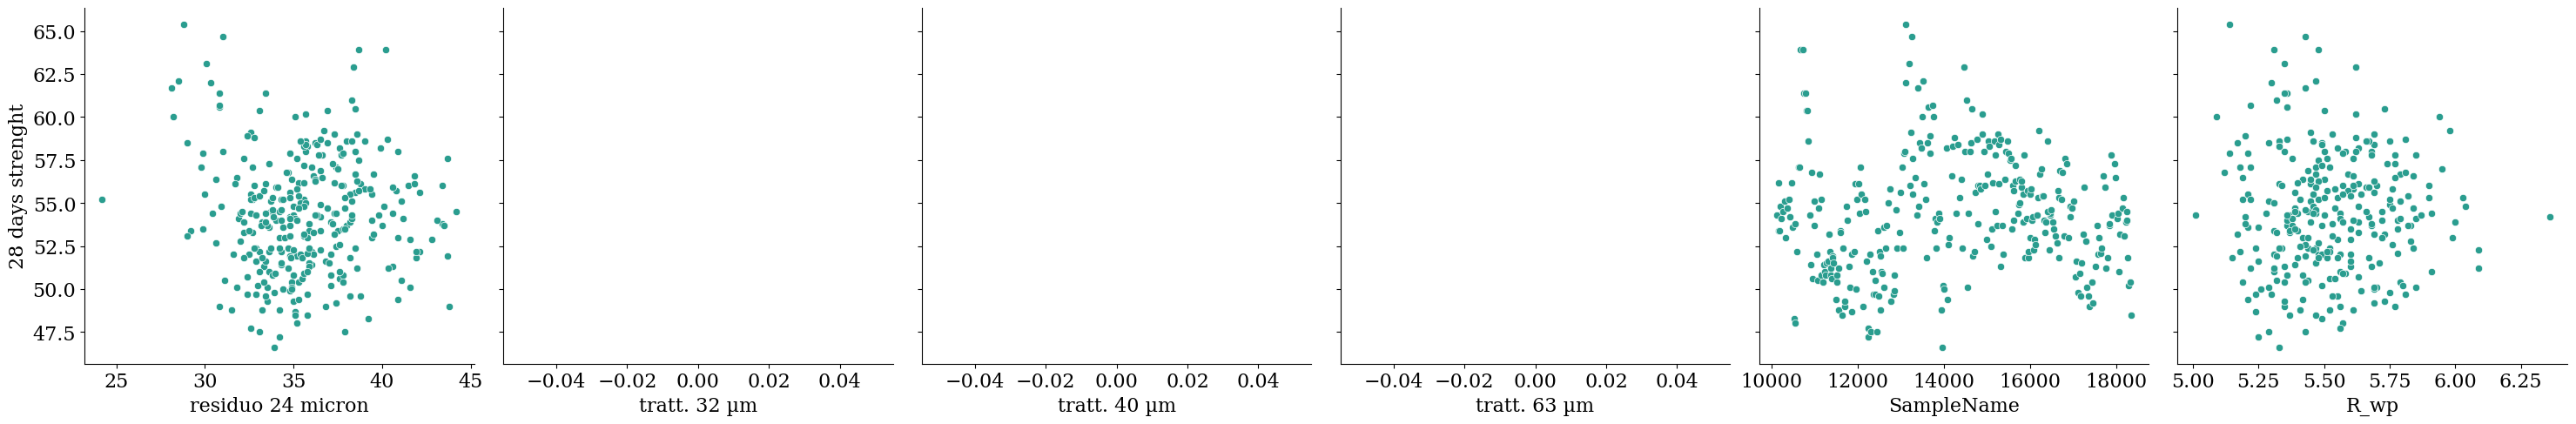

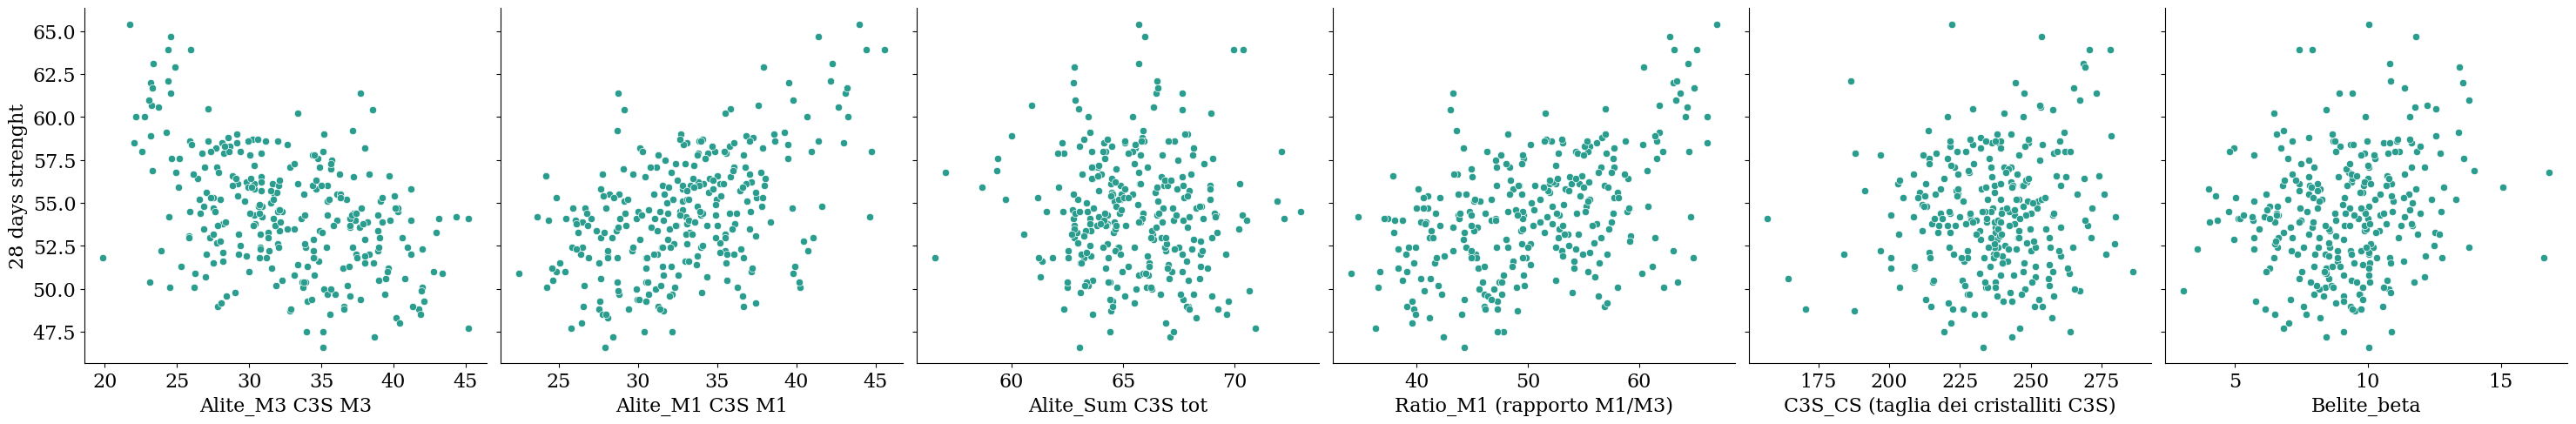

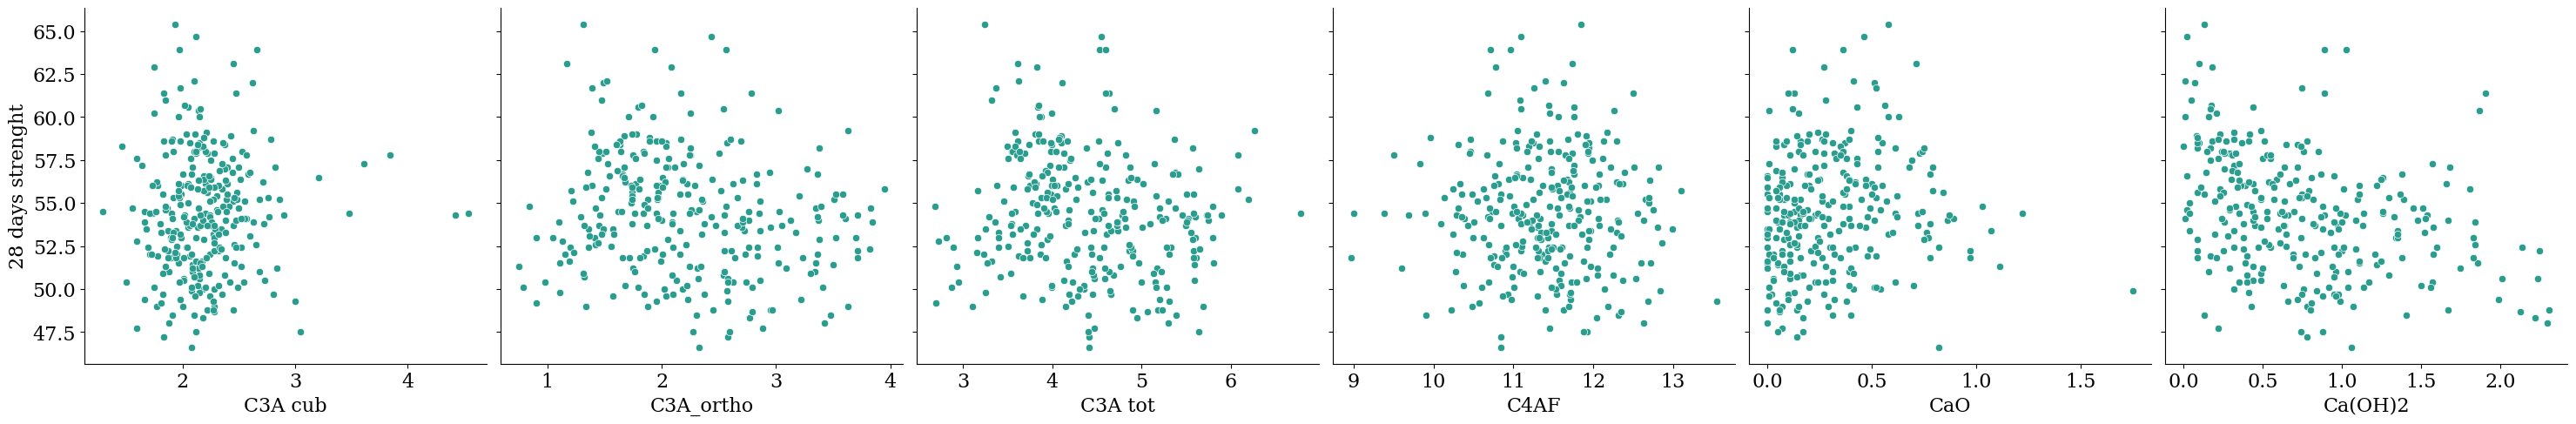

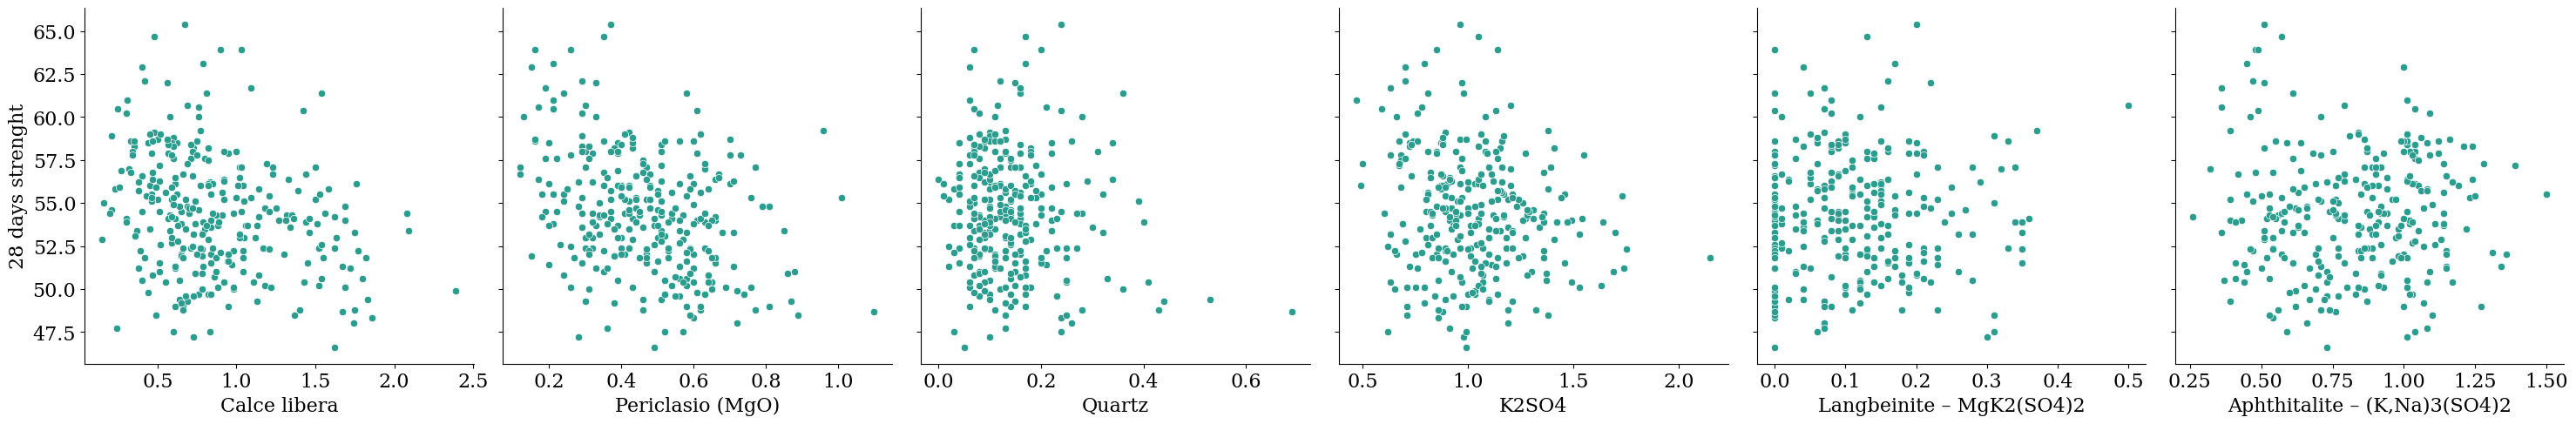

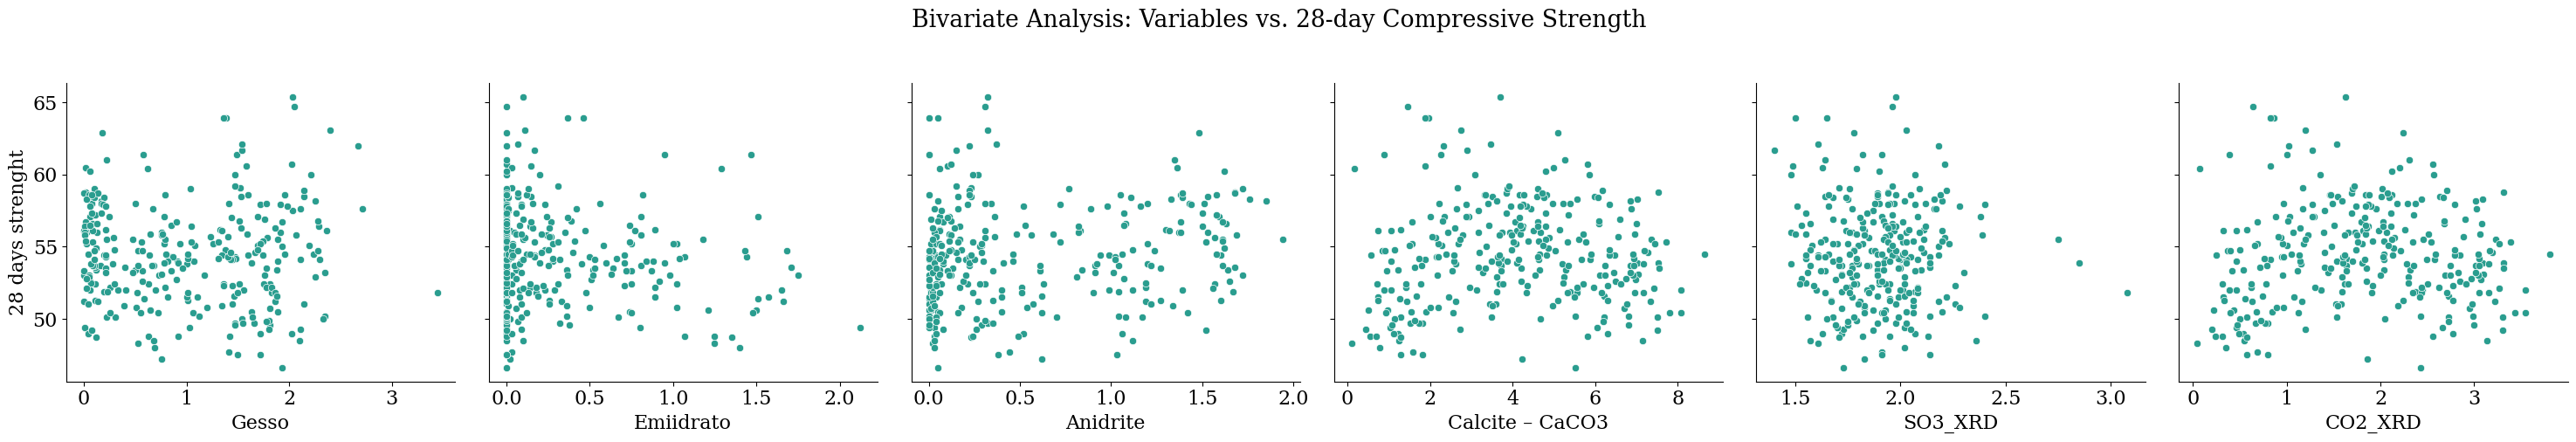

<IPython.core.display.Javascript object>

In [39]:
num_lines = 7
plots_per_line = 6

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("28 days strenght")


for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        data=df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["28 days strenght"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

grid.fig.suptitle(
    "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
)
plt.tight_layout()
plt.show()


In [40]:
# def corrfunc(x, y, ax=None, **kws):
#     """Plot the correlation coefficient in the top left hand corner of a plot."""
#     r, _ = pearsonr(x, y)
#     ax = ax or plt.gca()
#     ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
#     return None

<IPython.core.display.Javascript object>

In [41]:
# for pair in sol[sol > 0.75].index.values:
#     if pair[0] != pair[1]:
#         data = df[[pair[0], pair[1]]].dropna()
#         g = sns.pairplot(
#             data,
#             corner=True,
#             kind="reg",
#             plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
#         )
#         corrfunc(data[pair[0]], data[pair[1]])
#         g.set(xticklabels=[])
#         g.set(yticklabels=[])

# plt.tight_layout()

<IPython.core.display.Javascript object>

### 4. Data/Hora Variable Analyses

In [42]:
dates

0     2019-10-25
1     2019-10-31
2     2019-11-04
3     2019-11-06
4     2019-11-11
         ...    
317   2022-11-02
318   2022-11-03
319   2022-11-07
320   2022-11-09
321   2022-11-14
Name: data, Length: 322, dtype: datetime64[ns]

<IPython.core.display.Javascript object>

In [43]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

319 valid days out of 319


<IPython.core.display.Javascript object>

In [44]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2019, 2020, 2021, 2022}


<IPython.core.display.Javascript object>

In [45]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2019: {10, 11, 12},
 2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}}

<IPython.core.display.Javascript object>

In [46]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2019  10        2
      11        8
      12        7
2020  1         9
      2         9
      3         8
      4        10
      5         8
      6         9
      7         9
      8         9
      9         9
      10        8
      11        9
      12        8
2021  1         8
      2         8
      3        10
      4         8
      5         9
      6         9
      7         8
      8         9
      9         9
      10        7
      11       11
      12        9
2022  1         9
      2         8
      3        10
      4         9
      5         8
      6         9
      7         8
      8        10
      9         8
      10        8
      11        5
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

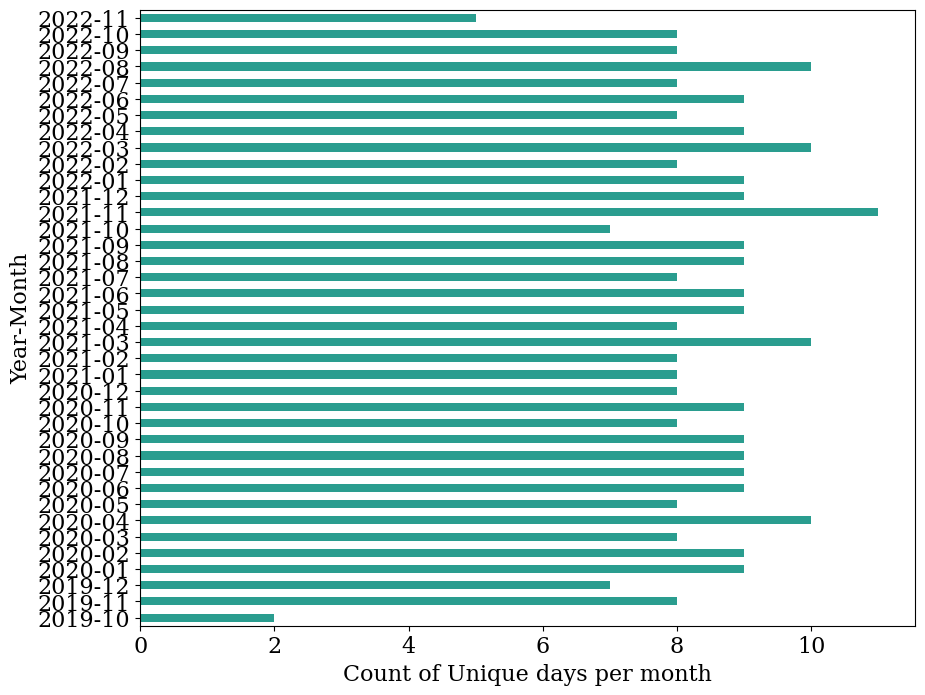

<IPython.core.display.Javascript object>

In [47]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [48]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2019  10        2
      11        8
      12        8
2020  1         9
      2         9
      3         8
      4        10
      5         8
      6         9
      7         9
      8         9
      9         9
      10        8
      11        9
      12        8
2021  1         8
      2         8
      3        10
      4         8
      5         9
      6         9
      7         8
      8         9
      9         9
      10        8
      11       11
      12        9
2022  1         9
      2         9
      3        10
      4         9
      5         8
      6         9
      7         8
      8        10
      9         8
      10        8
      11        5
Name: size, dtype: int64


<IPython.core.display.Javascript object>

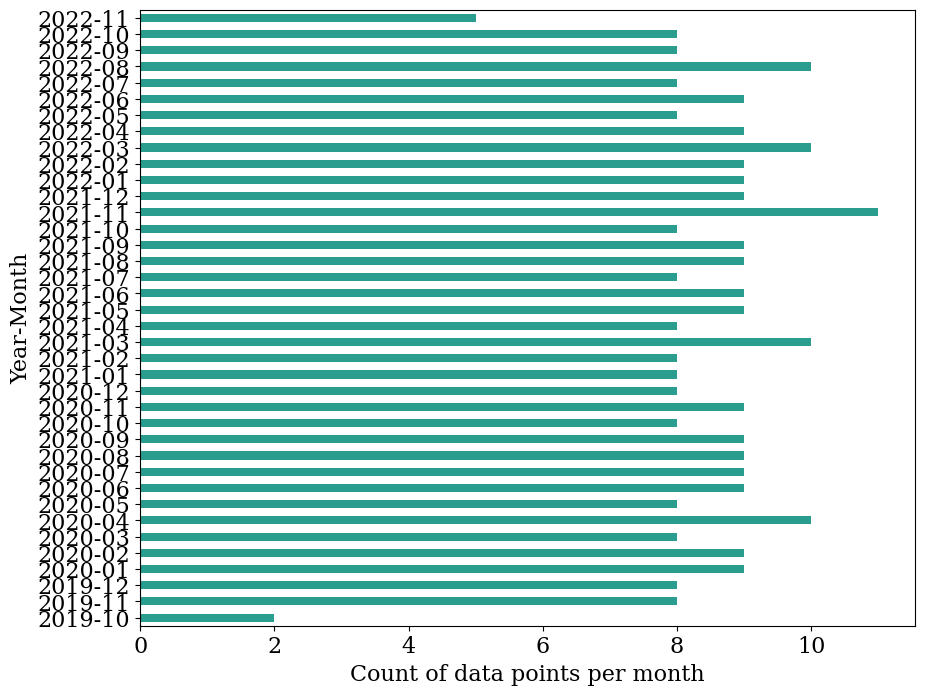

<IPython.core.display.Javascript object>

In [49]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [50]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2019-10 has the minimum number of days with samples - 2
2021-11 has the maximum number of days with samples - 11


<IPython.core.display.Javascript object>

In [51]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  319.000000
mean     1.009404
std      0.096671
min      1.000000
25%      1.000000
50%      1.000000
75%      1.000000
max      2.000000

<IPython.core.display.Javascript object>

In [52]:
day_counts[["DayCount"]].value_counts()

DayCount
1           316
2             3
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [53]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
15   2019     12   17         2
204  2021     10   14         2
243  2022      2   24         2

<IPython.core.display.Javascript object>

In [54]:
df_copy = df.copy()
df_copy["date"] = pd.to_datetime(df_copy["data"])
df_copy["Year"] = df_copy["date"].dt.year
df_copy["Month"] = df_copy["date"].dt.month
df_copy["Day"] = df_copy["date"].dt.day

df_merge = df_copy.merge(right=day_counts, how="left", on=["Year", "Month", "Day"])

uniques = df_merge["DayCount"].unique()
uniques.sort()

for daycount in uniques:
    nulls = df_merge[df_merge["DayCount"] == daycount]["28 days strenght"].isna().sum()
    print(daycount, nulls)

1 7
2 0


<IPython.core.display.Javascript object>

In [55]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i - 1])
# diffs

<IPython.core.display.Javascript object>

In [56]:
# Average Frequency
np.mean(diffs)

Timedelta('3 days 11:26:21.308411214')

<IPython.core.display.Javascript object>

In [57]:
Counter(diffs)

Counter({Timedelta('2 days 00:00:00'): 115,
         Timedelta('5 days 00:00:00'): 107,
         Timedelta('1 days 00:00:00'): 40,
         Timedelta('6 days 00:00:00'): 34,
         Timedelta('4 days 00:00:00'): 9,
         Timedelta('3 days 00:00:00'): 8,
         Timedelta('0 days 00:00:00'): 3,
         Timedelta('7 days 00:00:00'): 2,
         Timedelta('10 days 00:00:00'): 1,
         Timedelta('12 days 00:00:00'): 1,
         Timedelta('11 days 00:00:00'): 1})

<IPython.core.display.Javascript object>

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is de

<Axes: xlabel='count'>

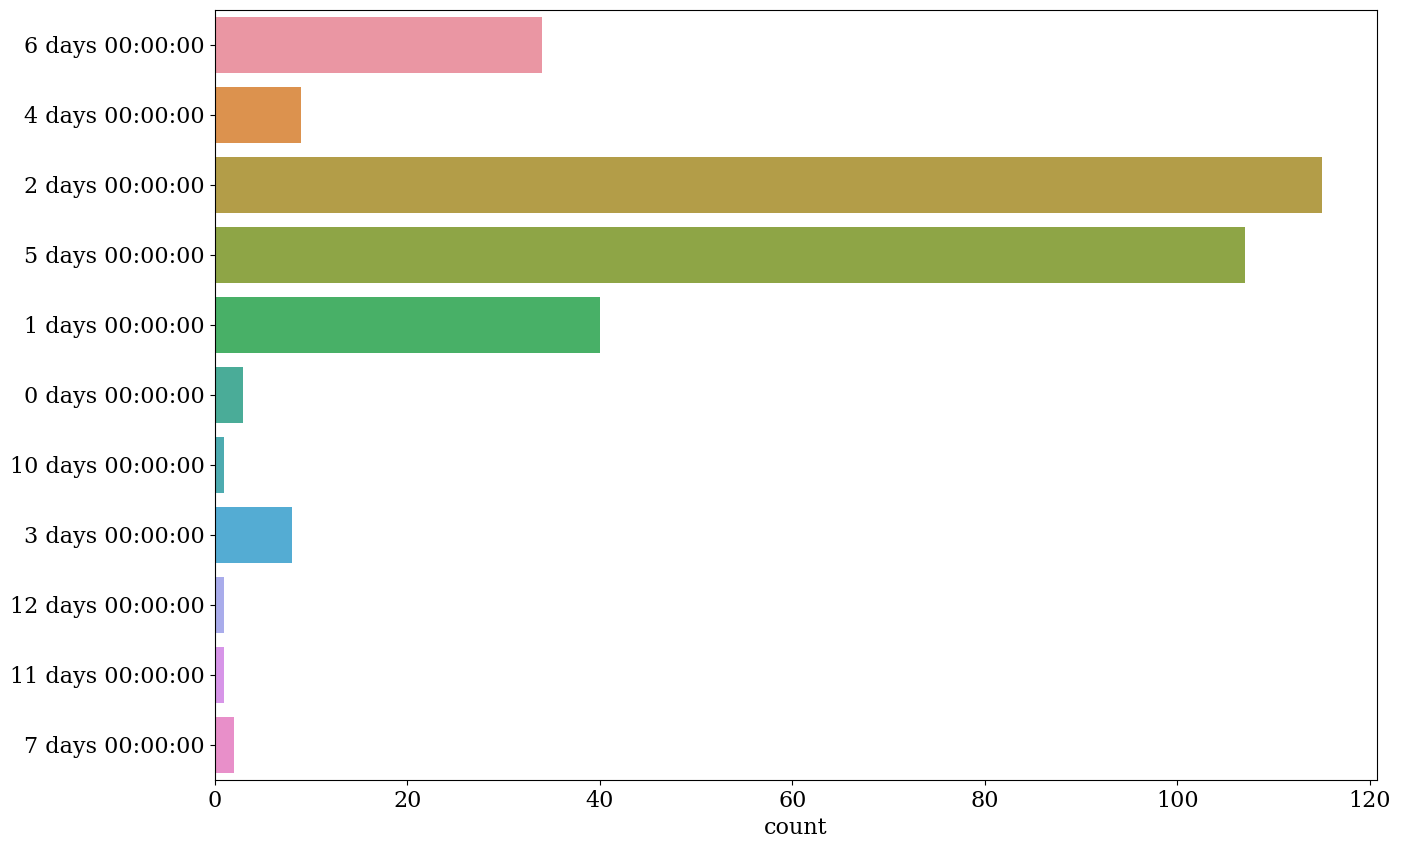

<IPython.core.display.Javascript object>

In [58]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [59]:
# percent of diffs
[round(val / df.shape[0] * 100, 2) for val in list(Counter(diffs).values())]

[10.56, 2.8, 35.71, 33.23, 12.42, 0.93, 0.31, 2.48, 0.31, 0.31, 0.62]

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 2 Days

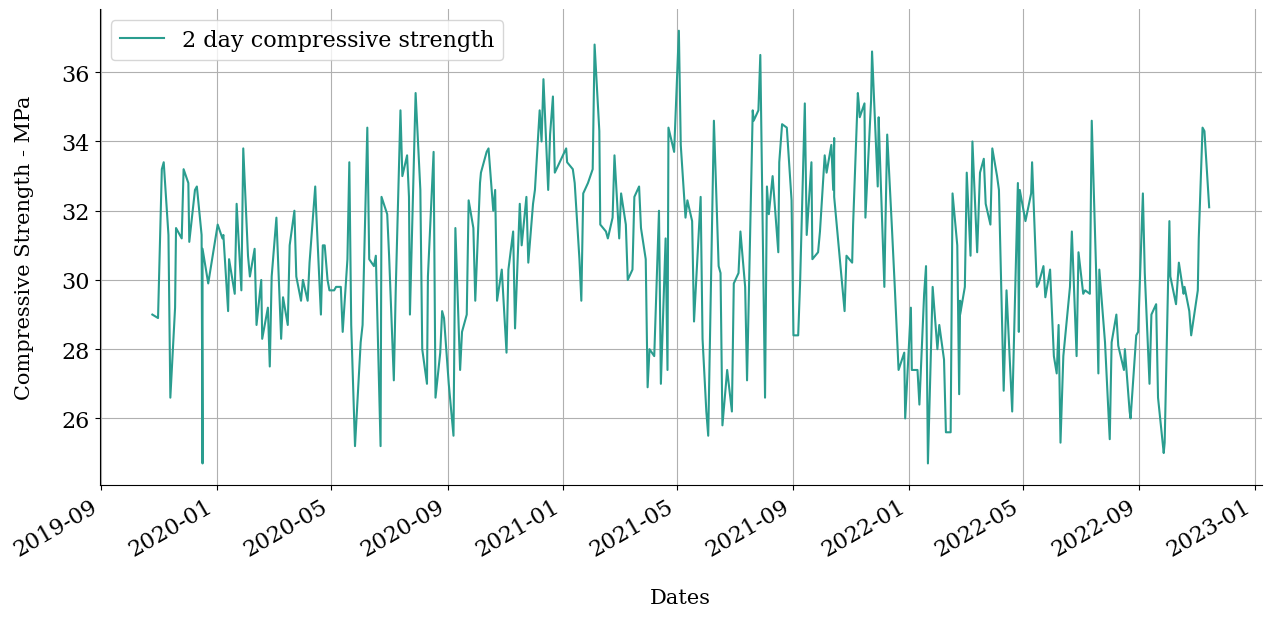

<IPython.core.display.Javascript object>

In [60]:
df["Date"] = pd.to_datetime(pd.to_datetime(df["data"]).dt.date)
tmp = df[["Date", "2 days strenght"]].dropna().copy()
tmp["Date"] = pd.to_datetime(tmp["Date"], format="%d/%m/%Y")
tmp = tmp.set_index("Date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["2 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 7 Days

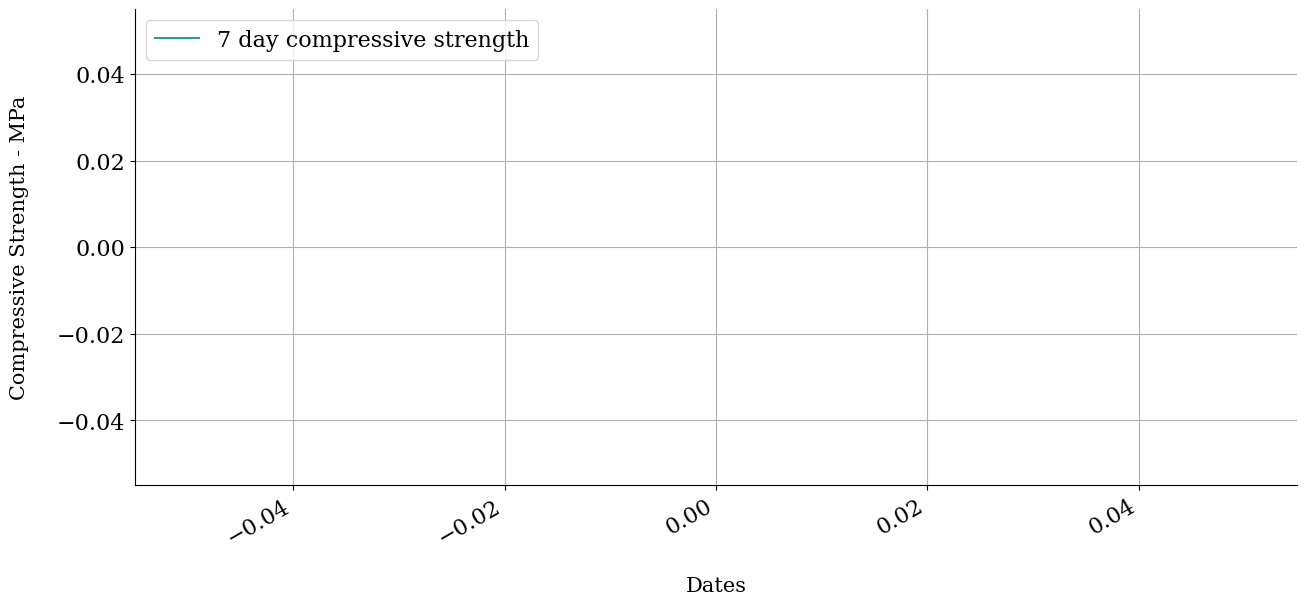

<IPython.core.display.Javascript object>

In [61]:
df["Date"] = pd.to_datetime(pd.to_datetime(df["data"]).dt.date)
tmp = df[["Date", "7 days strenght"]].dropna().copy()
tmp["Date"] = pd.to_datetime(tmp["Date"], format="%d/%m/%Y")
tmp = tmp.set_index("Date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 28 Days

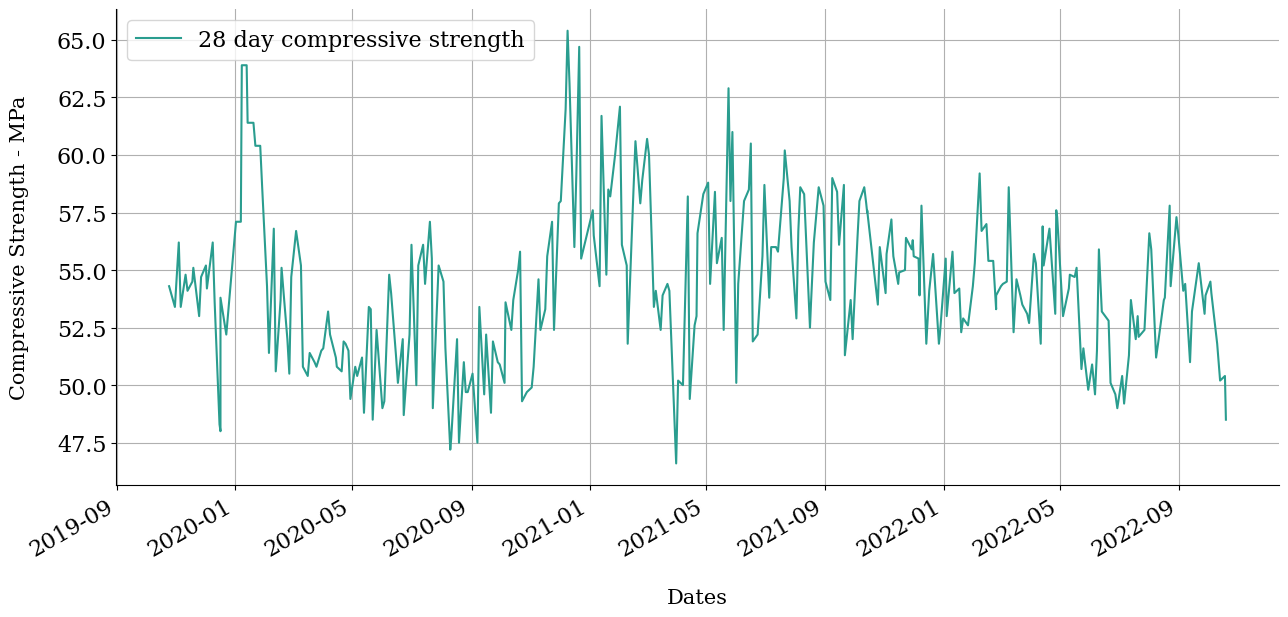

<IPython.core.display.Javascript object>

In [62]:
df["Date"] = pd.to_datetime(pd.to_datetime(df["data"]).dt.date)
tmp = df[["Date", "28 days strenght"]].dropna().copy()
tmp["Date"] = pd.to_datetime(tmp["Date"], format="%d/%m/%Y")
tmp = tmp.set_index("Date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()